In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud

#EDA:Coursera

In [ ]:
df_cur=pd.read_csv('/content/drive/MyDrive/proy_dos_henry/Moocs/Coursera_courses.csv')


In [ ]:
df_cur_re = pd.read_csv('/content/drive/MyDrive/proy_dos_henry/Moocs/Coursera_reviews.csv')

In [ ]:
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [ ]:
df_cur_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [ ]:
df_cur.head()

name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  \
0        Stanford University   
1      University of Alberta   
2            Yale University   
3                     Google   
4  Google - Spectrum Sharing   

                                          course_url  \
0    https://www.coursera.org/learn/machine-learning   
1   https://www.coursera.org/learn/indigenous-canada   
2  https://www.coursera.org/learn/the-science-of-...   
3  https://www.coursera.org/learn/technical-suppo...   
4  https://www.coursera.org/learn/google-cbrs-cpi...   

                        course_id  
0                machine-learning  
1               indigenous-canada  
2       the-science-of-well-being  
3  technical-support-fundamentals  
4        google-cbrs-cpi-training

In [ ]:
df_cur_re[50:60]

reviews      reviewers  \
50                               Very well explained.   By Century S   
51                                  Excellent course!       By Dan S   
52                                      Great course.  By Andrew J H   
53                                      Great course    By KARAN K S   
54                                       Great course    By Landon S   
55                                       Great course      By Mark B   
56  Solid presentation all the way through. I real...     By Logan D   
57  Probably the best certification course I've ta...    By Luis M C   
58  The ProctorU.com system took 2 times the amoun...     By scott w   
59  Covered all of the required information in an ...      By Ryan H   

    date_reviews  rating                 course_id  
50  Feb 25, 2020       5  google-cbrs-cpi-training  
51  Feb 13, 2020       5  google-cbrs-cpi-training  
52  Aug 30, 2020       5  google-cbrs-cpi-training  
53  Aug 17, 2020       5  google-cbrs-cpi-training  
54  Feb 09, 2020       5  google-cbrs-cpi-training  
55  Dec 03, 2019       5  google-cbrs-cpi-training  
56  Sep 03, 2020       5  google-cbrs-cpi-training  
57  Nov 21, 2019       5  google-cbrs-cpi-training  
58  Sep 28, 2020       5  google-cbrs-cpi-training  
59  Aug 26, 2019       5  google-cbrs-cpi-training

In [ ]:
df_cur_re['rating'].value_counts()

5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64

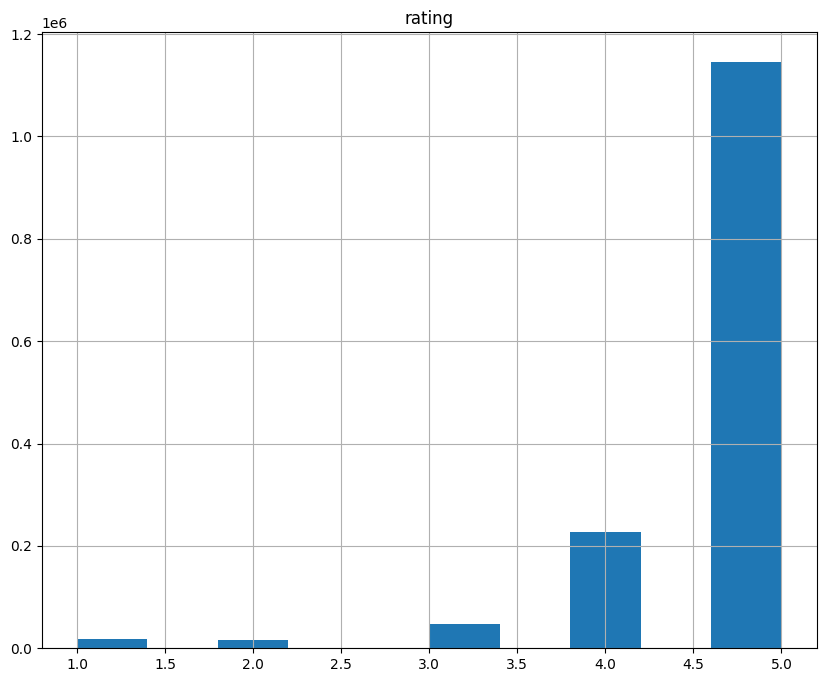

In [ ]:
#veamos como se comportan las variables
df_cur_re.hist(figsize=(10, 8))
plt.show()

Notemos que  la unica variable para analizar es la de raiting, aun que podriamos ver como se relaciona el raiting con las palabras clave de las reviews

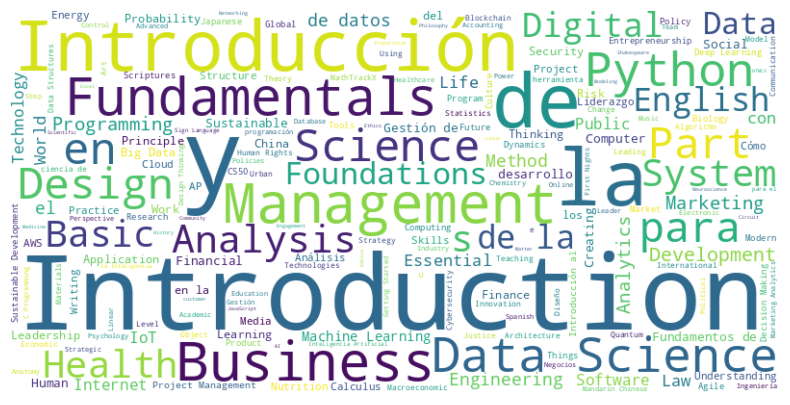

In [ ]:
#Veamos que palabras se repiten mas en los titulos
# Unir todos los títulos en una sola cadena
text_coursera = ' '.join(df_cur['name'].tolist())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_edx)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

La s palabras de introduccin y palabras que tienen que ver con tecnologia son las que mas se repiten

In [ ]:
#el nuevo data set de kaggle: https://www.kaggle.com/ayushbatra/online-mooc
df_cur_nuevo = pd.read_csv('/content/drive/MyDrive/proy_dos_henry/Moocs/Coursera_elnuevo.csv')

In [ ]:
df_cur_nuevo.head(3)

Course Name  \
0  Write A Feature Length Screenplay For Film Or ...   
1  Business Strategy: Business Model Canvas Analy...   
2                      Silicon Thin Film Solar Cells   

                  University Difficulty Level Course Rating  \
0  Michigan State University         Beginner           4.8   
1   Coursera Project Network         Beginner           4.8   
2        �cole Polytechnique         Advanced           4.1   

                                          Course URL  \
0  https://www.coursera.org/learn/write-a-feature...   
1  https://www.coursera.org/learn/canvas-analysis...   
2  https://www.coursera.org/learn/silicon-thin-fi...   

                                  Course Description  \
0  Write a Full Length Feature Film Script  In th...   
1  By the end of this guided project, you will be...   
2  This course consists of a general presentation...   

                                              Skills  
0  Drama  Comedy  peering  screenwriting  film  D...  
1  Finance  business plan  persona (user experien...  
2  chemistry  physics  Solar Energy  film  lambda...

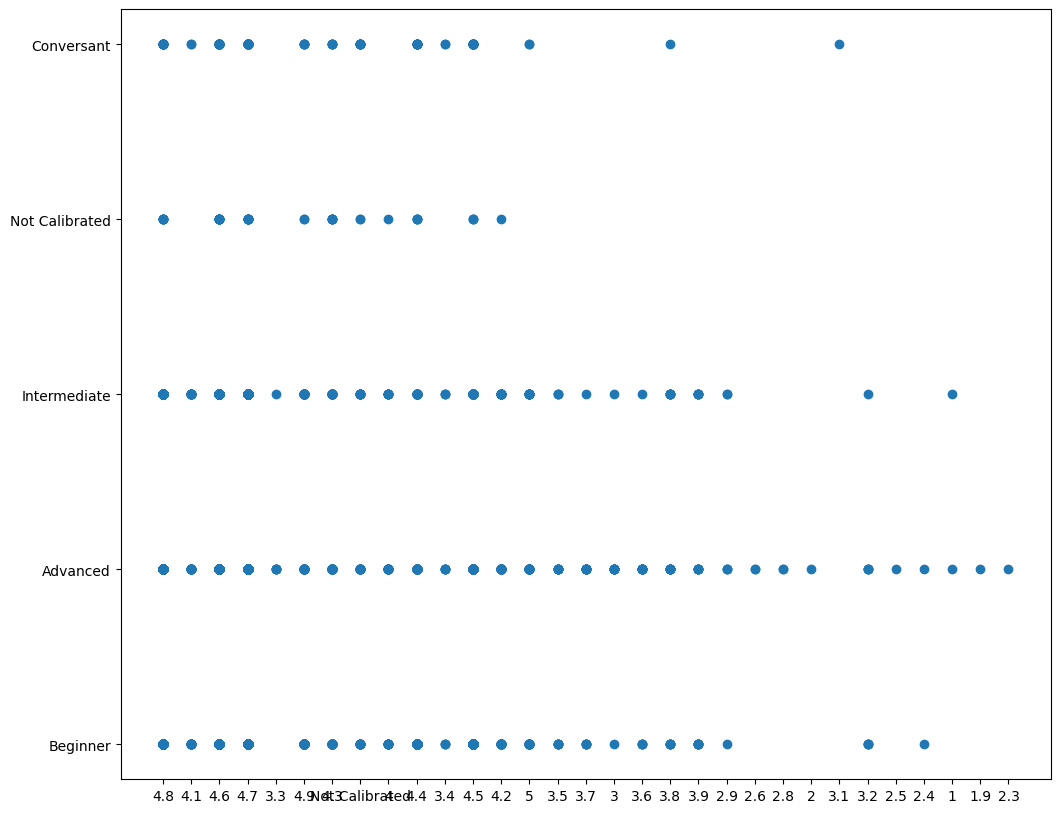

In [ ]:
# plt.plot(df_cur_nuevo['Course Rating'],label="Course Rating")
# plt.plot(df_cur_nuevo['Difficulty Level'],label="Difficulty Level")
# Personalizar el gráfico
plt.figure(figsize=(12, 10))
plt.scatter(df_cur_nuevo['Course Rating'], df_cur_nuevo['Difficulty Level'])

plt.show()

Notamos en la grafica anterior que los que son mas diverosos en calificaciones son los de nivel avanzado mientras que los intermedios y los basicos stienden a acumularse mas hacia el 4.8.


In [ ]:
df_cur_nuevo['Rating_nuevo'] = pd.to_numeric(df_cur_nuevo['Course Rating'], errors="coerce")

# Reemplazar "No calibrados" por 0
df_cur_nuevo['Rating_nuevo'].replace("No calibrados", 0, inplace=True)

# Convertir la columna a tipo float
df_cur_nuevo['Rating_nuevo'] = df_cur_nuevo['Rating_nuevo'].astype(float)

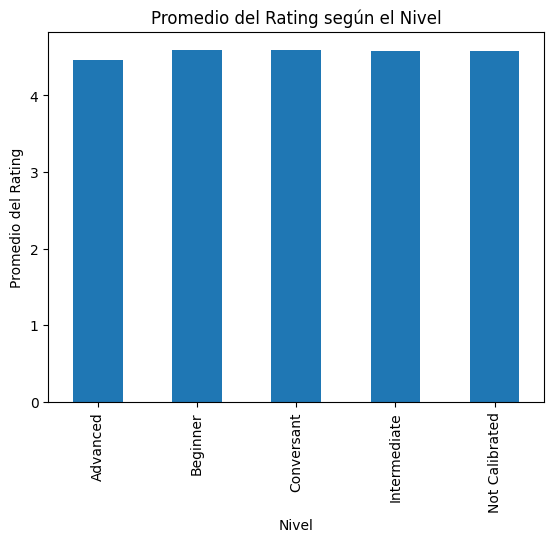

In [ ]:
# Agrupar por nivel y calcular el promedio del rating
promedio_rating_por_nivel = df_cur_nuevo.groupby("Difficulty Level")["Rating_nuevo"].mean()

# Crear el gráfico de barras
promedio_rating_por_nivel.plot(kind="bar")

# Personalizar el gráfico
plt.xlabel("Nivel")
plt.ylabel("Promedio del Rating")
plt.title("Promedio del Rating según el Nivel")

# Mostrar el gráfico
plt.show()

El raiting y el nivel nos pueden hablar que normalmente quien acompleta el curso es porque le ha gustado, por un lado y por otro nos puede dar un acercamiento a las asistencias ya que en general solo se te permite calificar un curso si lo has completado.

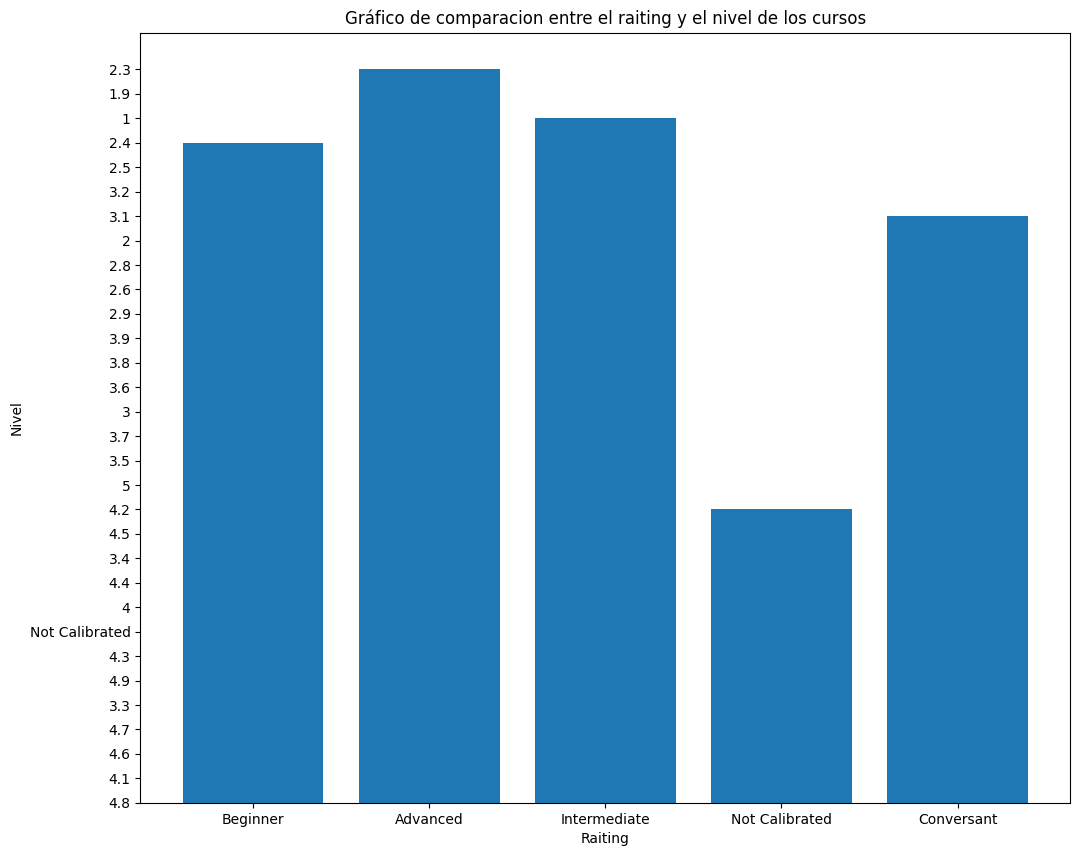

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 10))
plt.bar(df_cur_nuevo['Difficulty Level'], df_cur_nuevo['Course Rating'],)

# Personalizar el gráfico
plt.xlabel("Raiting")
plt.ylabel("Nivel")
plt.title("Gráfico de comparacion entre el raiting y el nivel de los cursos")

# Mostrar el gráfico
plt.show()

In [ ]:
#veamos la info imprtante
df_cur_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course Name         3522 non-null   object 
 1   University          3522 non-null   object 
 2   Difficulty Level    3522 non-null   object 
 3   Course Rating       3522 non-null   object 
 4   Course URL          3522 non-null   object 
 5   Course Description  3522 non-null   object 
 6   Skills              3522 non-null   object 
 7   Rating_nuevo        3440 non-null   float64
dtypes: float64(1), object(7)
memory usage: 220.2+ KB


In [ ]:
#eliminemos los dublicados y los nulos +
df_cur_nuevo.dropna()
df_cur_nuevo.drop_duplicates()

Course Name  \
0     Write A Feature Length Screenplay For Film Or ...   
1     Business Strategy: Business Model Canvas Analy...   
2                         Silicon Thin Film Solar Cells   
3                                  Finance for Managers   
4          Retrieve Data using Single-Table SQL Queries   
...                                                 ...   
3517  Capstone: Retrieving, Processing, and Visualiz...   
3518                   Patrick Henry: Forgotten Founder   
3519  Business intelligence and data analytics: Gene...   
3520                                Rigid Body Dynamics   
3521  Architecting with Google Kubernetes Engine: Pr...   

                                             University Difficulty Level  \
0                             Michigan State University         Beginner   
1                              Coursera Project Network         Beginner   
2                                   �cole Polytechnique         Advanced   
3                                  IESE Business School     Intermediate   
4                              Coursera Project Network         Beginner   
...                                                 ...              ...   
3517                             University of Michigan         Beginner   
3518                             University of Virginia     Intermediate   
3519                               Macquarie University         Advanced   
3520  Korea Advanced Institute of Science and Techno...         Beginner   
3521                                       Google Cloud     Intermediate   

     Course Rating                                         Course URL  \
0              4.8  https://www.coursera.org/learn/write-a-feature...   
1              4.8  https://www.coursera.org/learn/canvas-analysis...   
2              4.1  https://www.coursera.org/learn/silicon-thin-fi...   
3              4.8  https://www.coursera.org/learn/operational-fin...   
4              4.6  https://www.coursera.org/learn/single-table-sq...   
...            ...                                                ...   
3517           4.6  https://www.coursera.org/learn/python-data-vis...   
3518           4.9               https://www.coursera.org/learn/henry   
3519           4.6  https://www.coursera.org/learn/business-intell...   
3520           4.6  https://www.coursera.org/learn/rigid-body-dyna...   
3521           4.7  https://www.coursera.org/learn/deploying-secur...   

                                     Course Description  \
0     Write a Full Length Feature Film Script  In th...   
1     By the end of this guided project, you will be...   
2     This course consists of a general presentation...   
3     When it comes to numbers, there is always more...   
4     In this course you�ll learn how to effectively...   
...                                                 ...   
3517  In the capstone, students will build a series ...   
3518  �Give me liberty, or give me death:� Rememberi...   
3519  �Megatrends� heavily influence today�s organis...   
3520  This course teaches dynamics, one of the basic...   
3521  In this course, "Architecting with Google Kube...   

                                                 Skills  Rating_nuevo  
0     Drama  Comedy  peering  screenwriting  film  D...           4.8  
1     Finance  business plan  persona (user experien...           4.8  
2     chemistry  physics  Solar Energy  film  lambda...           4.1  
3     accounts receivable  dupont analysis  analysis...           4.8  
4     Data Analysis  select (sql)  database manageme...           4.6  
...                                                 ...           ...  
3517  Databases  syntax  analysis  web  Data Visuali...           4.6  
3518  retirement  Causality  career  history of the ...           4.9  
3519  analytics  tableau software  Business Intellig...           4.6  
3520  Angular  Mechanical Design  fluid mechanics  F...           4.6  
3521  bigtable  bigquery  SQL  Google Cloud 

In [ ]:
#veamos la cantidad de cursos
df_cur_nuevo['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

<Axes: xlabel='Difficulty Level'>

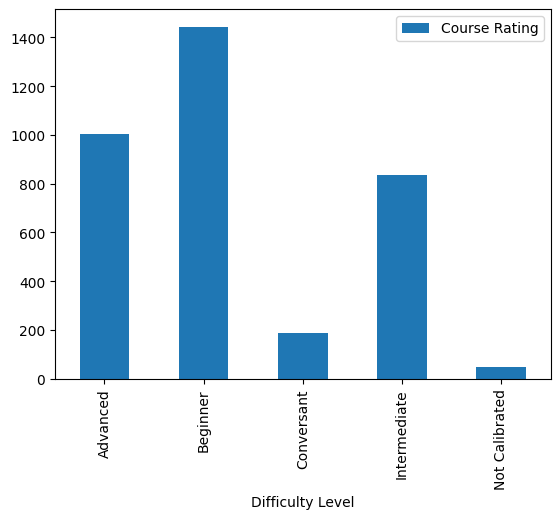

In [ ]:
# Crear una tabla de pivote
pivot_table = df_cur_nuevo.pivot_table(index='Difficulty Level', values='Course Rating', aggfunc='count')

# Crear la gráfica de barras
pivot_table.plot(kind='bar')

La grafica anterior nos da un conteo de la cantitidad de raitings segun el nivel lo que nos puede hablar de la cantidad de alumnos que tomaron y terminaron el curso


In [ ]:
#veamos los niveles que hay de los cursos
df_cur_nuevo['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [ ]:
#hagamos a esa columna unos dumis
df_cur_nivel = pd.get_dummies(df_cur_nuevo['Difficulty Level'])


In [ ]:
#unamos dicho data con el rating
df_cur_nivel['Raiting']= df_cur_nuevo['Course Rating']

In [ ]:
df_cur_nivel.head(3)

Advanced  Beginner  Conversant  Intermediate  Not Calibrated Raiting
0         0         1           0             0               0     4.8
1         0         1           0             0               0     4.8
2         1         0           0             0               0     4.1

In [ ]:
#veamos los valores de el raiting:
df_cur_nivel['Raiting'].value_counts()
#notamos que hay datos que no estan calibrados or lo que los podemos dropear para hacer el analisis

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Raiting, dtype: int64

In [ ]:
df_cur_nivel = df_cur_nivel.drop(df_cur_nivel[df_cur_nivel['Raiting'] == 'Not Calibrated'].index)

In [ ]:
#hagamos al raint un flotante
df_cur_nivel['Raiting'] = df_cur_nivel['Raiting'].astype(float)

<Axes: >

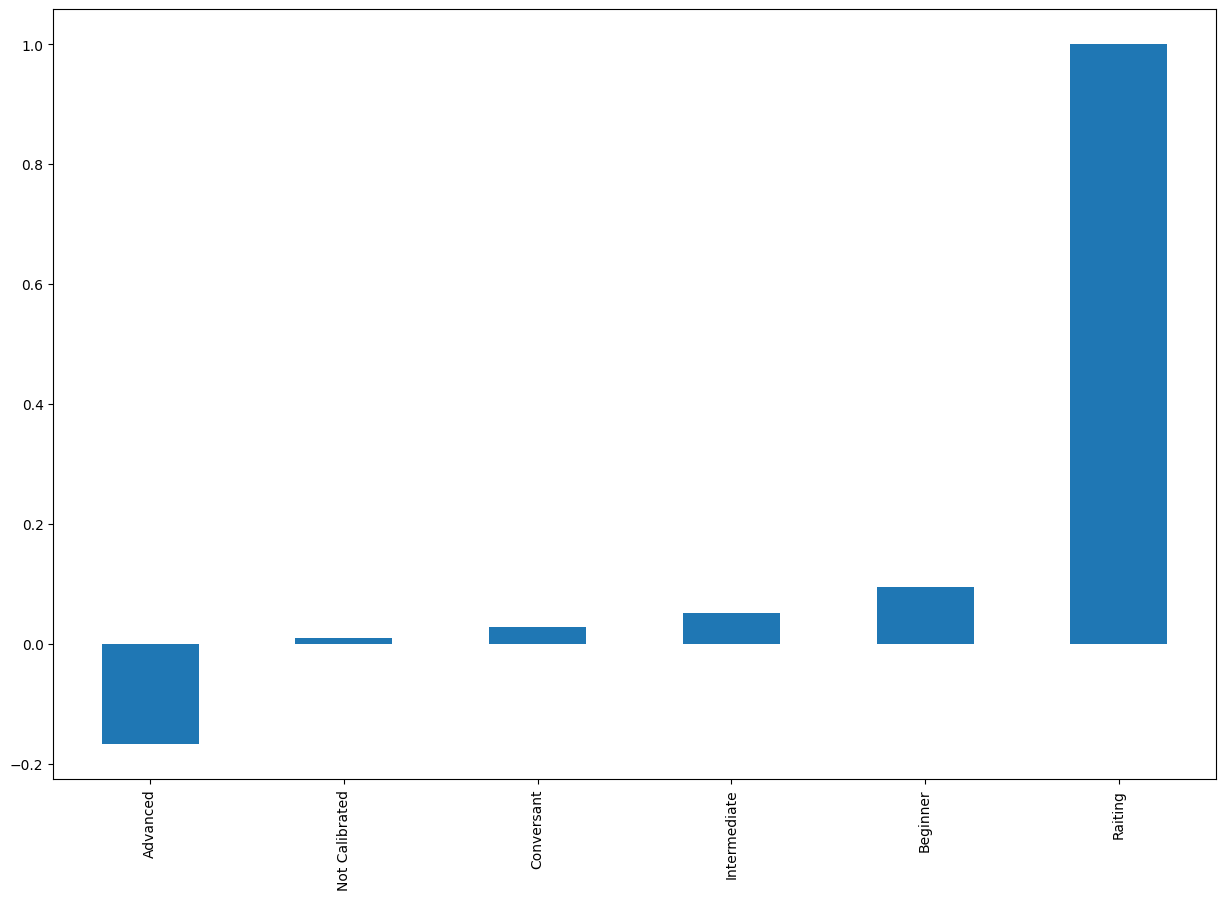

In [ ]:
#ahora hagamos una comparacion entre los niveles y le raiting
plt.figure(figsize = (15,10))
df_cur_nivel.corr()['Raiting'].sort_values(ascending= True).plot(kind='bar')

En la siguiente grafica podemos  ver las variables que se correlacionan con el Raiting, las cuales son el nivel Biginer, donde la mayoria de cursos son de tecnologia como programacion y ciencia de datos, ademas que esta inversamente correlacionada con los cursos avanzados.

#EDA: Edx

In [ ]:
df_edx = pd.read_csv('/content/drive/MyDrive/proy_dos_henry/Moocs/edx_courses.csv')

In [ ]:
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [ ]:
df_edx.head(3)

title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   

                                             summary n_enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   

               course_type                 institution  \
0  Self-paced on your time                         edX   
1  Self-paced on your time  The University of Michigan   
2  Self-paced on your time          Harvard University   

                               instructors         Level  \
0  Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                        Charles Severance  Introductory   
2       David J. Malan-Doug Lloyd-Brian Yu  Introductory   

                        subject language subtitles        course_effort  \
0  Education & Teacher Training  English   English   2–3 hours per week   
1              Computer Science  English   English   2–4 hours per week   
2              Computer Science  English   English  6–18 hours per week   

  course_length                                        price  \
0       2 Weeks  FREE-Add a Verified Certificate for $49 USD   
1       7 Weeks  FREE-Add a Verified Certificate for $49 USD   
2      12 Weeks  FREE-Add a Verified Certificate for $90 USD   

                                  course_description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   
2  This is CS50x , Harvard University's introduct...   

                                     course_syllabus  \
0  Welcome - We start with opportunities to meet ...   
1                                                NaN   
2                                                NaN   

                                          course_url  
0     https://www.edx.org/course/how-to-learn-online  
1  https://www.edx.org/course/programming-for-eve...  
2  https://www.edx.org/course/cs50s-introduction-...

In [ ]:
idiomas_contados = df_edx['language'].value_counts()
print(idiomas_contados)

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64


In [ ]:
#veamos cuantos tipos de subtitulos tiene
df_edx['subtitles'].value_counts()

English                                                                            713
Español                                                                            157
English, 中文                                                                         21
English, Español                                                                    21
English, हिन्दी                                                                     10
Français                                                                             7
English, Русский                                                                     5
Italiano                                                                             4
Português                                                                            4
English, 中文, 中文                                                                      3
English, 日本語                                                                         3
English, Français                          

In [ ]:
df_edx['course_length'].value_counts()

4 Weeks     194
6 Weeks     187
5 Weeks     148
7 Weeks      92
8 Weeks      84
10 Weeks     83
12 Weeks     36
3 Weeks      35
2 Weeks      20
9 Weeks      20
15 Weeks     18
14 Weeks     17
16 Weeks     14
1 Weeks       8
11 Weeks      7
13 Weeks      7
18 Weeks      4
17 Weeks      1
Name: course_length, dtype: int64

In [ ]:
# Filtrar por filas con 'ingles' o 'espanol'
df_edx = df_edx.loc[df_edx['language'].isin(['English', 'Español'])]

In [ ]:
df_edx['Level'].value_counts()


Introductory    607
Intermediate    261
Advanced         85
Name: Level, dtype: int64

In [ ]:
#hagamos dumis
df_edx_idioma = pd.get_dummies(df_edx['language'])
df_edx_nivel = pd.get_dummies(df_edx['Level'])

In [ ]:
#Unamos los datasets
df_edx = pd.concat([df_edx, df_edx_idioma], axis=1)

In [ ]:
df_edx = pd.concat([df_edx, df_edx_nivel], axis=1)

In [ ]:
#se puede notar uqe no les gustan las cifras cerradasla mayoria termina en 9 y 5
df_edx['price'].value_counts()

FREE-Add a Verified Certificate for $49 USD        262
FREE-Add a Verified Certificate for $99 USD        135
FREE-Add a Verified Certificate for $50 USD         95
FREE-Add a Verified Certificate for $199 USD        85
FREE-Add a Verified Certificate for $149 USD        76
FREE-Add a Verified Certificate for $25 USD         46
FREE-Add a Verified Certificate for $139 USD        30
FREE-Add a Verified Certificate for $150 USD        27
FREE-Add a Verified Certificate for $249 USD        26
FREE-Add a Verified Certificate for $79 USD         21
FREE-Add a Verified Certificate for $169 USD        19
FREE-Add a Verified Certificate for $29 USD         15
FREE-Add a Verified Certificate for $39 USD         13
FREE-Add a Verified Certificate for $299 USD         9
FREE-Add a Verified Certificate for $129 USD         9
FREE-Add a Verified Certificate for $125 USD         8
FREE-Add a Verified Certificate for $5 USD           7
FREE-Add a Verified Certificate for $59 USD          7
FREE-Add a

La cantidad de variables del precio es muy grande por lo que se tendra que acotar

In [ ]:
df_edx['price'] = df_edx['price'].str.extract('(\d+)', expand=False)

In [ ]:
#veamos como se relaciona el precio y los inscritos usando dummis y escjiendo a los primeros 5
df_edx_precio = pd.get_dummies(df_edx['price'])
df_edx_precio
#df_edx_p = df_edx_precio.loc[:,'FREE-Add a Verified Certificate for $49 USD','FREE-Add a Verified Certificate for $99 USD ','FREE-Add a Verified Certificate for $50 USD', 'FREE-Add a Verified Certificate for $199 USD', 'FREE-Add a Verified Certificate for $149 USD']

10  100  119  125  129  139  149  15  150  159  ...  50  59  60  65  69  \
0     0    0    0    0    0    0    0   0    0    0  ...   0   0   0   0   0   
1     0    0    0    0    0    0    0   0    0    0  ...   0   0   0   0   0   
2     0    0    0    0    0    0    0   0    0    0  ...   0   0   0   0   0   
3     0    0    0    0    0    0    0   0    0    0  ...   0   0   0   0   0   
4     0    0    0    0    0    0    0   0    0    0  ...   0   0   0   0   0   
..   ..  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...  ..  ..  ..  ..  ..   
969   0    0    0    0    0    1    0   0    0    0  ...   0   0   0   0   0   
970   0    0    0    0    0    0    0   0    0    0  ...   0   0   0   0   0   
972   0    0    0    0    0    1    0   0    0    0  ...   0   0   0   0   0   
973   0    0    0    0    0    0    0   0    0    0  ...   0   0   0   0   0   
974   0    0    0    0    0    0    0   0    0    0  ...   0   0   0   0   0   

     70  75  79  90  99  
0     0   0   0   0   0  
1     0   0   0   0   0  
2     0   0   0   1   0  
3     0   0   0   0   0  
4     0   0   0   0   0  
..   ..  ..  ..  ..  ..  
969   0   0   0   0   0  
970   0   0   0   0   0  
972   0   0   0   0   0  
973   0   0   0   0   0  
974   0   0   1   0   0  

[953 rows x 43 columns]

In [ ]:
df_edx_p = df_edx_precio.loc[:,['49','99', '50','199','149']]

In [ ]:
df_edx = pd.concat([df_edx, df_edx_p], axis=1)

In [ ]:
df_edx['course_length'].value_counts()

4 Weeks     193
6 Weeks     186
5 Weeks     146
7 Weeks      91
8 Weeks      83
10 Weeks     75
3 Weeks      35
12 Weeks     30
2 Weeks      20
9 Weeks      20
15 Weeks     18
14 Weeks     17
16 Weeks     14
1 Weeks       8
11 Weeks      7
13 Weeks      5
18 Weeks      4
17 Weeks      1
Name: course_length, dtype: int64

In [ ]:
#hagamos a la columna de cantidad de tiempo una columna numerica
df_edx['course_length'] = df_edx['course_length'].str.extract('(\d+)', expand=False)

In [ ]:
#eliminemos algunas columnas que por ahora no son relevantes
df_edx.drop(['summary','course_type','institution','subject', 'subtitles', 'course_effort', 'course_description', 'course_syllabus', 'course_url'], axis=1, inplace=True)

In [ ]:
#Y quitemos los nan
df_edx.dropna()
df_edx.drop_duplicates()

title n_enrolled  \
0                                  How to Learn Online    124,980   
1    Programming for Everybody (Getting Started wit...    293,864   
2              CS50's Introduction to Computer Science  2,442,271   
3                                   The Analytics Edge    129,555   
4    Marketing Analytics: Marketing Measurement Str...     81,140   
..                                                 ...        ...   
969         Global China: From the Mongols to the Ming     41,902   
970  Leaders in Citizen Security and Justice Manage...        NaN   
972  Computational Neuroscience: Neuronal Dynamics ...     11,246   
973  Cities and the Challenge of Sustainable Develo...      8,775   
974                      MathTrackX: Special Functions        NaN   

                                           instructors         Level language  \
0              Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory  English   
1                                    Charles Severance  Introductory  English   
2                   David J. Malan-Doug Lloyd-Brian Yu  Introductory  English   
3    Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate  English   
4                                       Stephan Sorger  Introductory  English   
..                                                 ...           ...      ...   
969                      Peter K. Bol-William C. Kirby  Introductory  English   
970  Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...  Intermediate  English   
972                                   Wulfram Gerstner      Advanced  English   
973                                   Jeffrey D. Sachs  Introductory  English   
974                                    Dr David Butler  Introductory  English   

    course_length price  English  Español  Advanced  Intermediate  \
0               2    49        1        0         0             0   
1               7    49        1        0         0             0   
2              12    90        1        0         0             0   
3              13   199        1        0         0             1   
4               4   249        1        0         0             0   
..            ...   ...      ...      ...       ...           ...   
969            15   139        1        0         0             0   
970            10    25        1        0         0             1   
972             6   139        1        0         1             0   
973             1    25        1        0         0             0   
974             4    79        1        0         0             0   

     Introductory  49  99  50  199  149  
0               1   1   0   0    0    0  
1               1   1   0   0    0    0  
2               1   0   0   0    0    0  
3               0   0   0   0    1    0  
4               1   0   0   0    0    0  
..            ...  ..  ..  ..  ...  ...  
969             1   0   0   0    0    0  
970             0   0   0   0    0    0  
972             0   0   0   0    0    0  
973             1   0   0   0    0    0  
974             1   0   0   0    0    0  

[952 rows x 17 columns]

In [ ]:
df_edx

title n_enrolled  \
0                                  How to Learn Online    124,980   
1    Programming for Everybody (Getting Started wit...    293,864   
2              CS50's Introduction to Computer Science  2,442,271   
3                                   The Analytics Edge    129,555   
4    Marketing Analytics: Marketing Measurement Str...     81,140   
..                                                 ...        ...   
969         Global China: From the Mongols to the Ming     41,902   
970  Leaders in Citizen Security and Justice Manage...        NaN   
972  Computational Neuroscience: Neuronal Dynamics ...     11,246   
973  Cities and the Challenge of Sustainable Develo...      8,775   
974                      MathTrackX: Special Functions        NaN   

                                           instructors         Level language  \
0              Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory  English   
1                                    Charles Severance  Introductory  English   
2                   David J. Malan-Doug Lloyd-Brian Yu  Introductory  English   
3    Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate  English   
4                                       Stephan Sorger  Introductory  English   
..                                                 ...           ...      ...   
969                      Peter K. Bol-William C. Kirby  Introductory  English   
970  Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...  Intermediate  English   
972                                   Wulfram Gerstner      Advanced  English   
973                                   Jeffrey D. Sachs  Introductory  English   
974                                    Dr David Butler  Introductory  English   

    course_length price  English  Español  Advanced  Intermediate  \
0               2    49        1        0         0             0   
1               7    49        1        0         0             0   
2              12    90        1        0         0             0   
3              13   199        1        0         0             1   
4               4   249        1        0         0             0   
..            ...   ...      ...      ...       ...           ...   
969            15   139        1        0         0             0   
970            10    25        1        0         0             1   
972             6   139        1        0         1             0   
973             1    25        1        0         0             0   
974             4    79        1        0         0             0   

     Introductory  49  99  50  199  149  
0               1   1   0   0    0    0  
1               1   1   0   0    0    0  
2               1   0   0   0    0    0  
3               0   0   0   0    1    0  
4               1   0   0   0    0    0  
..            ...  ..  ..  ..  ...  ...  
969             1   0   0   0    0    0  
970             0   0   0   0    0    0  
972             0   0   0   0    0    0  
973             1   0   0   0    0    0  
974             1   0   0   0    0    0  

[953 rows x 17 columns]

<Axes: xlabel='Level'>

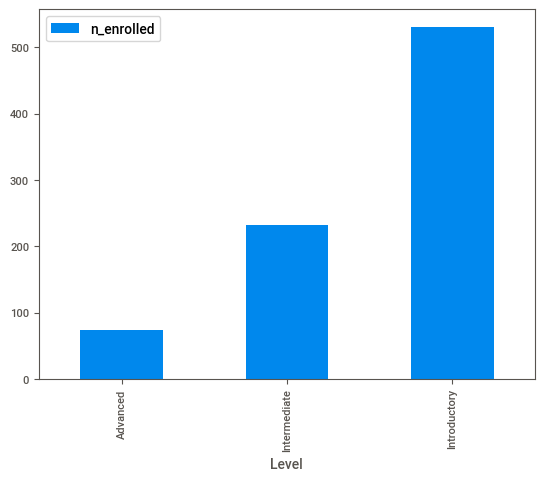

In [ ]:
# Crear una tabla de pivote
pivot_table_edx = df_edx.pivot_table(index='Level', values='n_enrolled', aggfunc='count')

# Agregar la columna de cantidad de inscritos a la tabla de pivote
#pivot_table['Inscritos'] = df.groupby('Nivel')['Inscritos'].sum()

# Crear la gráfica de barras con ambas columnas
pivot_table_edx.plot(kind='bar')

<Axes: xlabel='course_length'>

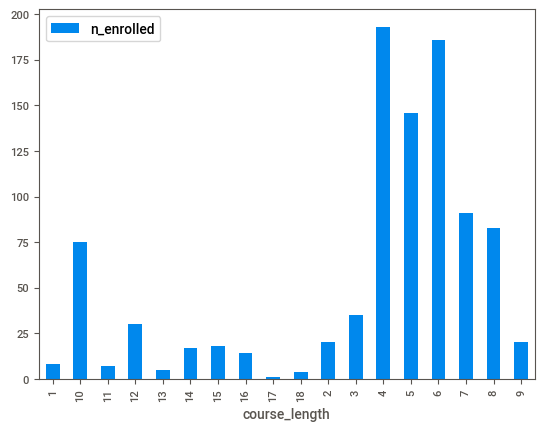

In [ ]:
# Crear una tabla de pivote para ver la cantidad de inscritos segun la duracion
pivot_table_edx_duracion = df_edx.pivot_table(index='course_length', values='n_enrolled', aggfunc='count')

# Agregar la columna de cantidad de inscritos a la tabla de pivote
#pivot_table['Inscritos'] = df.groupby('Nivel')['Inscritos'].sum()

# Crear la gráfica de barras con ambas columnas
pivot_table_edx_duracion.plot(kind='bar')

Notemos que la mayoria de inscritos va desde las 4 semanas a las 8

In [ ]:
#limpiemos los datos de comas, llenemos los nan con cero y transformemos a entero la columna n_enrolled
df_edx['n_enrolled'] = df_edx['n_enrolled'].str.replace(',', '').fillna(0).astype(int)


In [ ]:
# Obtener la tabla de frecuencias
tabla_frecuencias = df_edx['n_enrolled'].value_counts()

# Mostrar la tabla de frecuencias
print(tabla_frecuencias)

0        116
11426      2
97291      2
10129      2
6169       2
        ... 
55576      1
12133      1
60713      1
9796       1
8775       1
Name: n_enrolled, Length: 832, dtype: int64


In [ ]:
# #un grafico de violin
# sns.violinplot(df_edx, y='n_enrolled')

<ipython-input-92-93dc70167807>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_edx.corr()['n_enrolled'].sort_values(ascending= True).plot(kind='bar')


<Axes: >

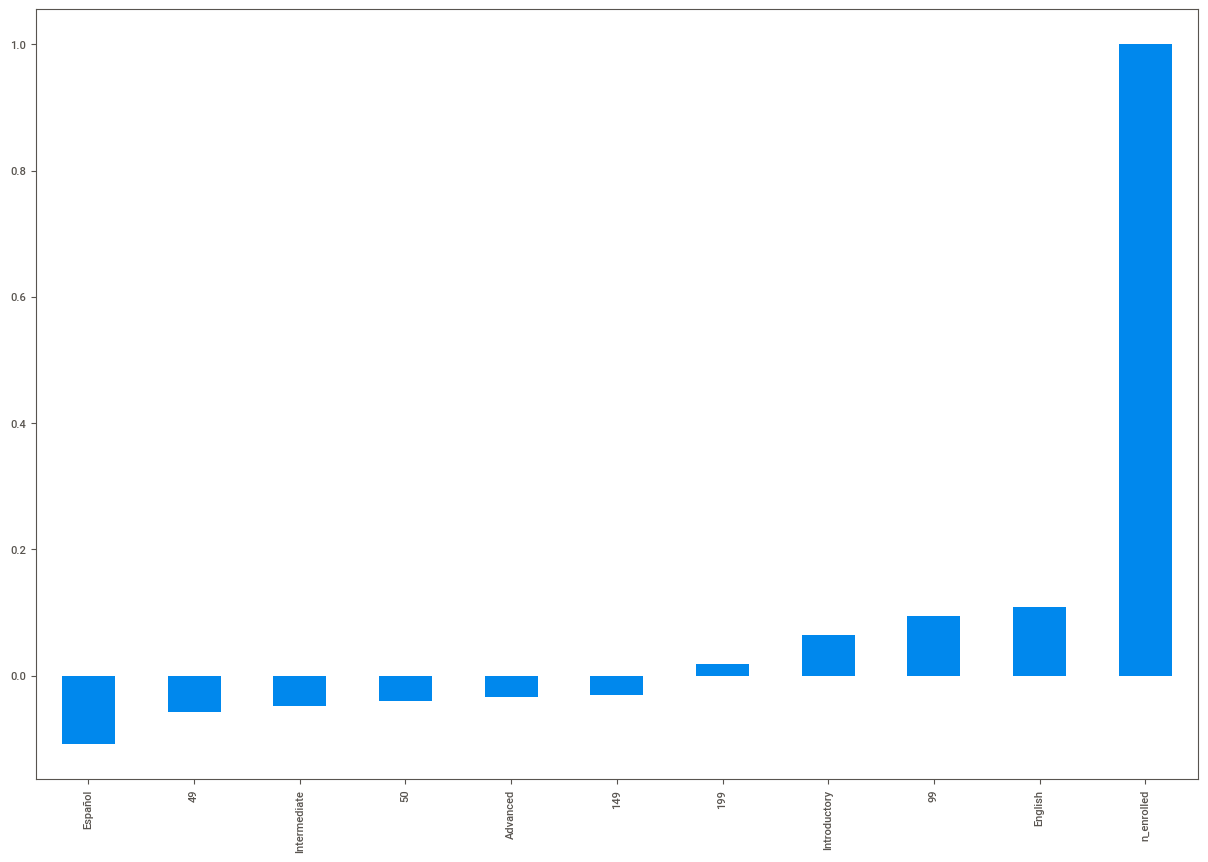

In [ ]:
plt.figure(figsize = (15,10))
df_edx.corr()['n_enrolled'].sort_values(ascending= True).plot(kind='bar')

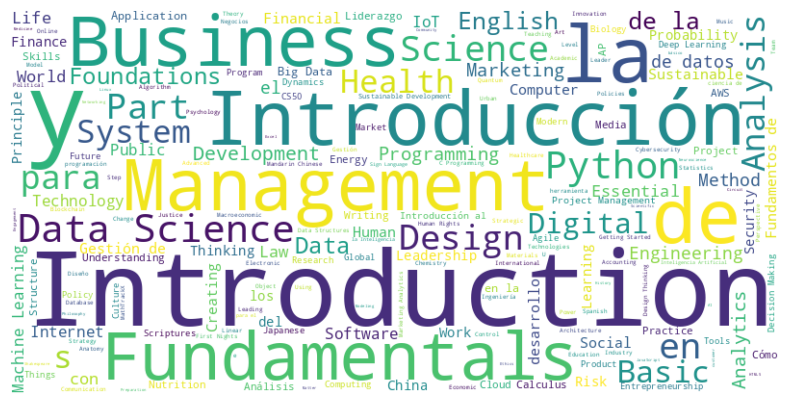

In [ ]:
#Veamos que palabras se repiten mas en los titulos
# Unir todos los títulos en una sola cadena
text_edx = ' '.join(df_edx['title'].tolist())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_edx)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Dado el analisis podemos ver que las variables que mas se correlacionan con la cantidad de inscritos es que esten en idioma ingles, que sean cursos de introduccion y de un precio de 99 a 199 dollares y estan inversamente correlacionados los cursos de idiomas diferentes como el español y con costos menores o mayores a los ya planteados y de nivel intermedio.

#EDA: Udemy

In [ ]:
df_udemy = pd.read_csv('/content/drive/MyDrive/proy_dos_henry/Moocs/udemy_courses.csv')

Tasa de conversión de inscriptos gratuitos a inscriptos pagados -calculado como el número de inscriptos en cursos pagados / número de inscriptos en cursos gratuitos * 100-. El objetivo a futuro propuesto por la empresa es evaluar si en la tendencia se logra incrementar esta tasa en un 15% en comparación con el año anterior. Actualmente, para este cálculo, usted posee la información de Udemy, pero como desafío extra, se le pide buscar datasets complementarios y evaluar este KPI en las distintas plataformas.

In [ ]:
df_udemy['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

In [ ]:
df_udemy.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance  
3               3.0  2017-05-30T20:07:24Z  Business Finance  
4               2.0  2016-12-13T14:57:18Z  Business Finance

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/proy_dos_henry/Moocs/udemy_courses.csv')

# Extraer el año de la columna "published_timestamp"
df['year_published'] = pd.to_datetime(df['published_timestamp']).dt.year

# Filtrar los cursos pagados y gratuitos por año
cursos_pagados = df[df['is_paid'] & (df['price'] > 0)]
cursos_gratuitos = df[df['price'] == 0]

# Calcular el número total de inscritos en cursos pagados por año
inscritos_pagados_por_año = cursos_pagados.groupby('year_published')['num_subscribers'].sum()

# Calcular el número total de inscritos en cursos gratuitos por año
inscritos_gratuitos_por_año = cursos_gratuitos.groupby('year_published')['num_subscribers'].sum()

# Calcular la tasa de conversión por año
tasa_conversion_por_año = (inscritos_pagados_por_año / inscritos_gratuitos_por_año) * 100

# Imprimir el resultado
print("Tasa de conversión de inscritos gratuitos a inscritos pagados por año:")
print(tasa_conversion_por_año)

Tasa de conversión de inscritos gratuitos a inscritos pagados por año:
year_published
2011           NaN
2012    125.050453
2013     87.461644
2014    136.066853
2015    369.441720
2016    371.667011
2017    344.685711
Name: num_subscribers, dtype: float64


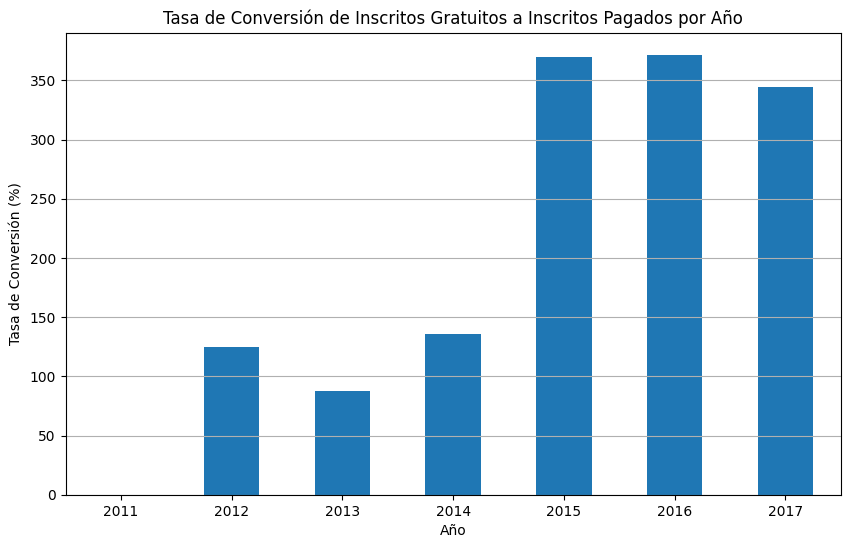

Incremento porcentual de la tasa de conversión en comparación con el año anterior:
year_published
2011           NaN
2012           NaN
2013    -30.058915
2014     55.573170
2015    171.514857
2016      0.602339
2017     -7.259536
Name: num_subscribers, dtype: float64


In [ ]:
# Graficar la tasa de conversión por año
plt.figure(figsize=(10, 6))
tasa_conversion_por_año.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de Conversión de Inscritos Gratuitos a Inscritos Pagados por Año')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

# Calcular el incremento porcentual de la tasa de conversión en comparación con el año anterior
incremento_anual = tasa_conversion_por_año.pct_change() * 100

# Imprimir el incremento porcentual
print("Incremento porcentual de la tasa de conversión en comparación con el año anterior:")
print(incremento_anual)

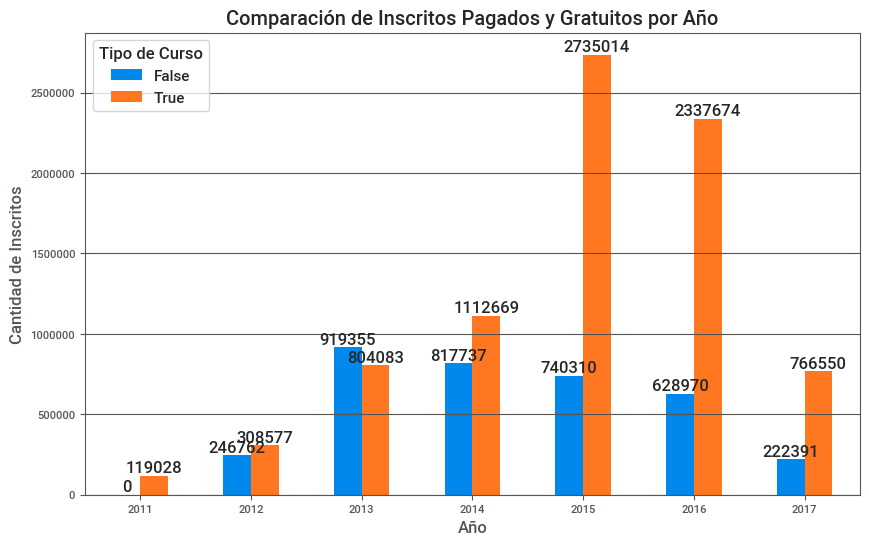

In [ ]:

# Extraer el año de la columna "published_timestamp"
df['year_published'] = pd.to_datetime(df['published_timestamp']).dt.year

# Crear la tabla pivote de inscritos pagados y gratuitos por año
pivot_table = df.pivot_table(index='year_published', columns='is_paid', values='num_subscribers', aggfunc='sum')

# Graficar la tabla pivote con etiquetas de texto
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind='bar', ax=ax)

# Agregar etiquetas de texto a cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel('Año')
plt.ylabel('Cantidad de Inscritos')
plt.title('Comparación de Inscritos Pagados y Gratuitos por Año')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Curso', loc='upper left')
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

Otros kpis

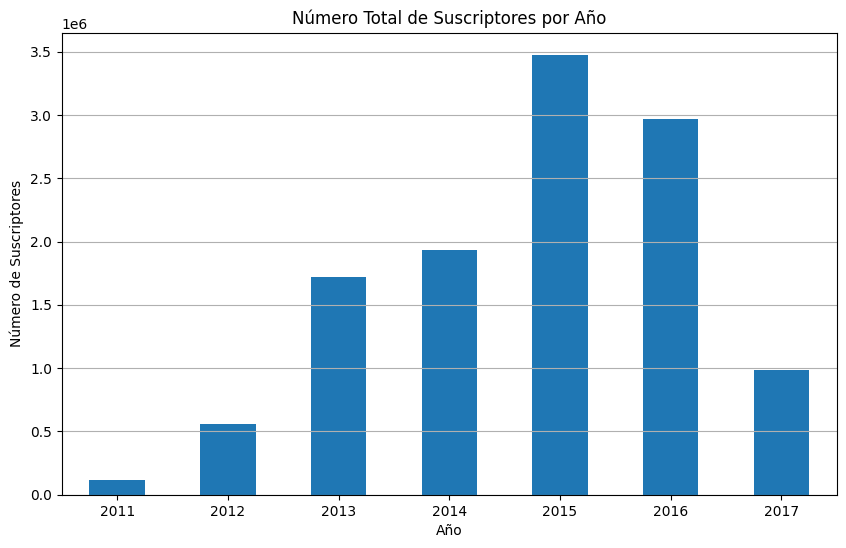

In [ ]:
#Número total de suscriptores por año:
# Extraer el año de la columna "published_timestamp"
df['year_published'] = pd.to_datetime(df['published_timestamp']).dt.year

# Calcular el número total de suscriptores por año
total_subscribers_by_year = df.groupby('year_published')['num_subscribers'].sum()

# Graficar el número total de suscriptores por año
total_subscribers_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Número de Suscriptores')
plt.title('Número Total de Suscriptores por Año')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

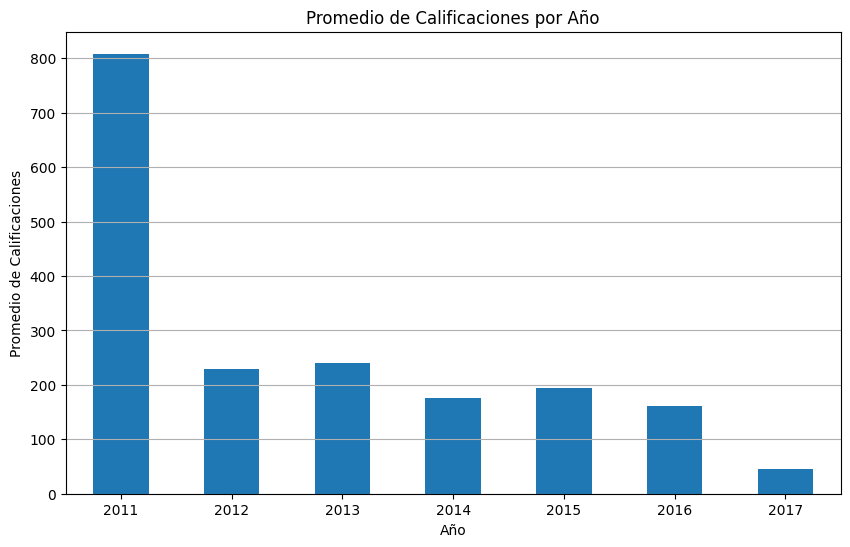

In [ ]:
#Promedio de calificaciones por año:
# Extraer el año de la columna "published_timestamp"
df['year_published'] = pd.to_datetime(df['published_timestamp']).dt.year

# Calcular el promedio de calificaciones por año
average_reviews_by_year = df.groupby('year_published')['num_reviews'].mean()

# Graficar el promedio de calificaciones por año
average_reviews_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Promedio de Calificaciones')
plt.title('Promedio de Calificaciones por Año')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

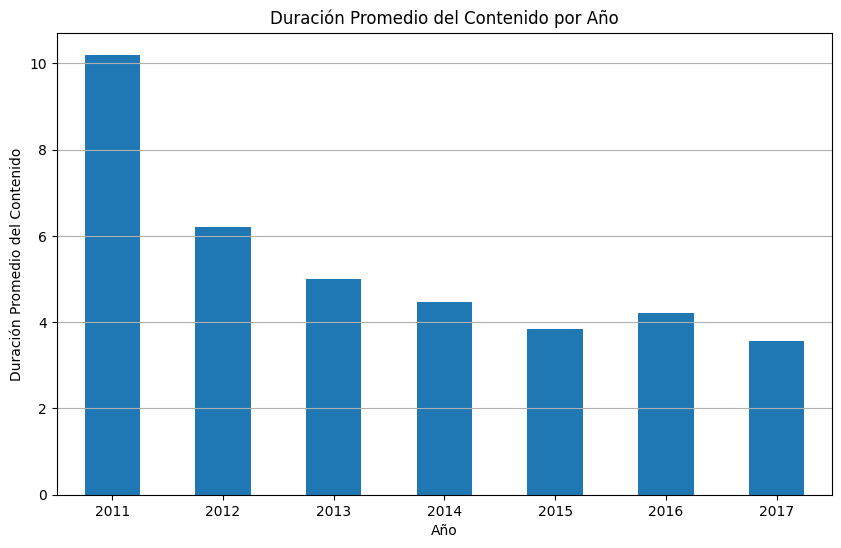

In [ ]:
#Duración promedio del contenido por año:
# Extraer el año de la columna "published_timestamp"
df['year_published'] = pd.to_datetime(df['published_timestamp']).dt.year

# Calcular la duración promedio del contenido por año
average_duration_by_year = df.groupby('year_published')['content_duration'].mean()

# Graficar la duración promedio del contenido por año
average_duration_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Duración Promedio del Contenido')
plt.title('Duración Promedio del Contenido por Año')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

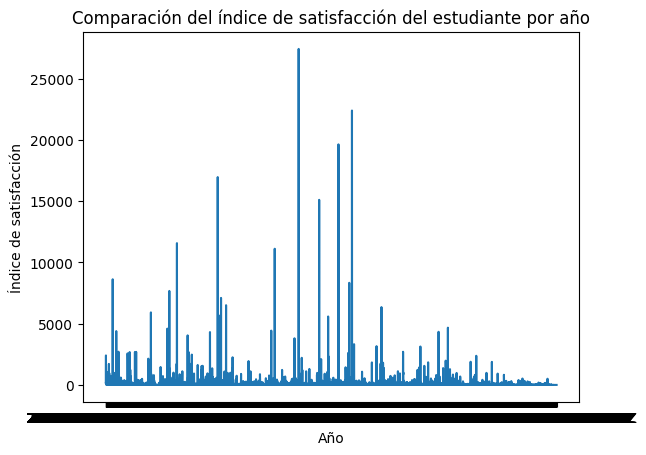

In [ ]:
# Calcular el índice de satisfacción del estudiante por año
satisfaction_by_year = df.groupby('published_timestamp')['num_reviews'].mean()

# Crear la gráfica comparativa
plt.plot(satisfaction_by_year.index, satisfaction_by_year.values)
plt.xlabel('Año')
plt.ylabel('Índice de satisfacción')
plt.title('Comparación del índice de satisfacción del estudiante por año')
plt.show()

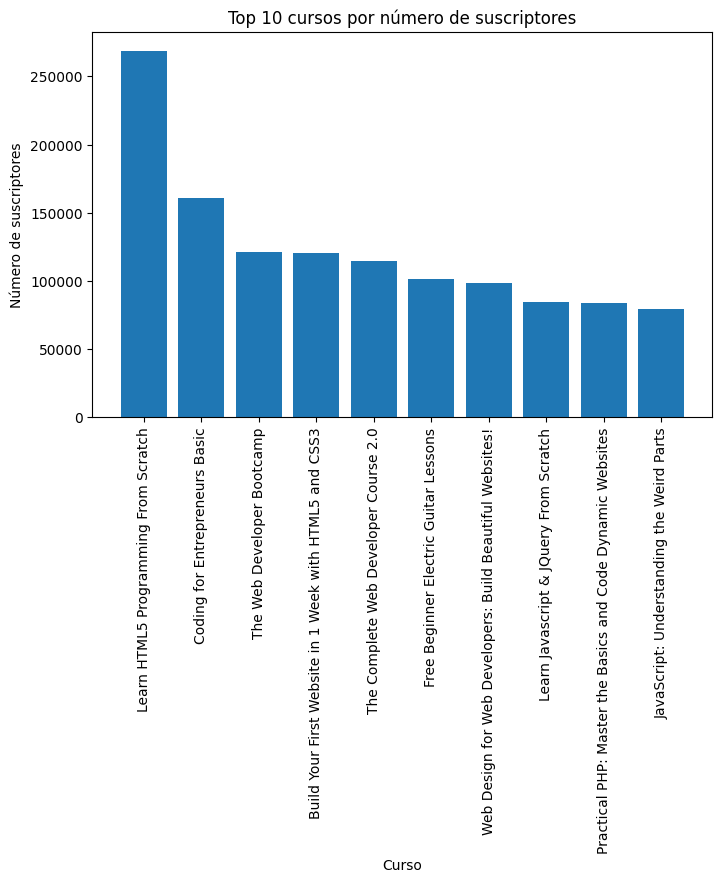

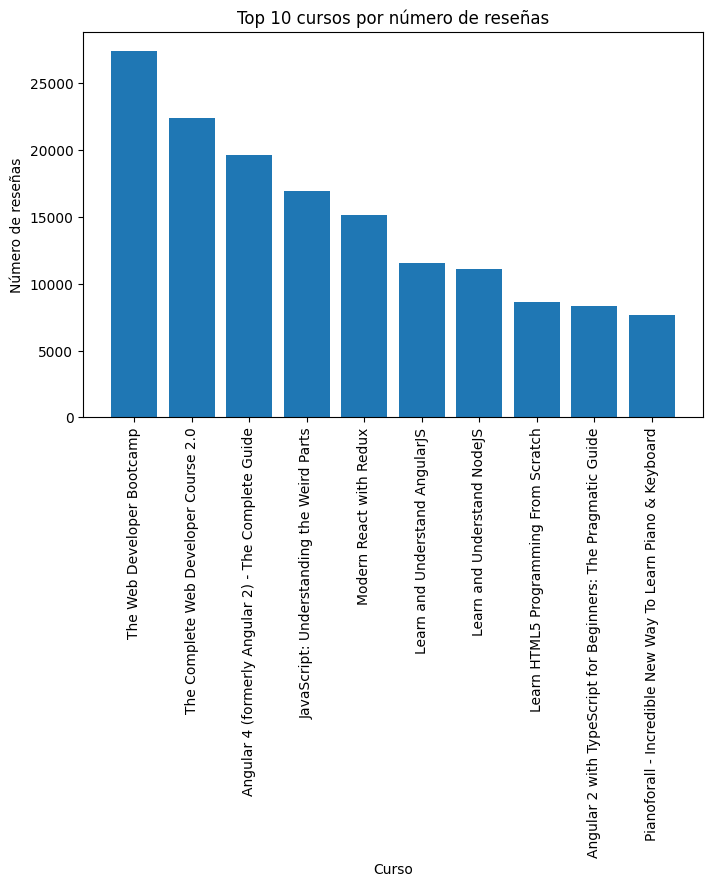

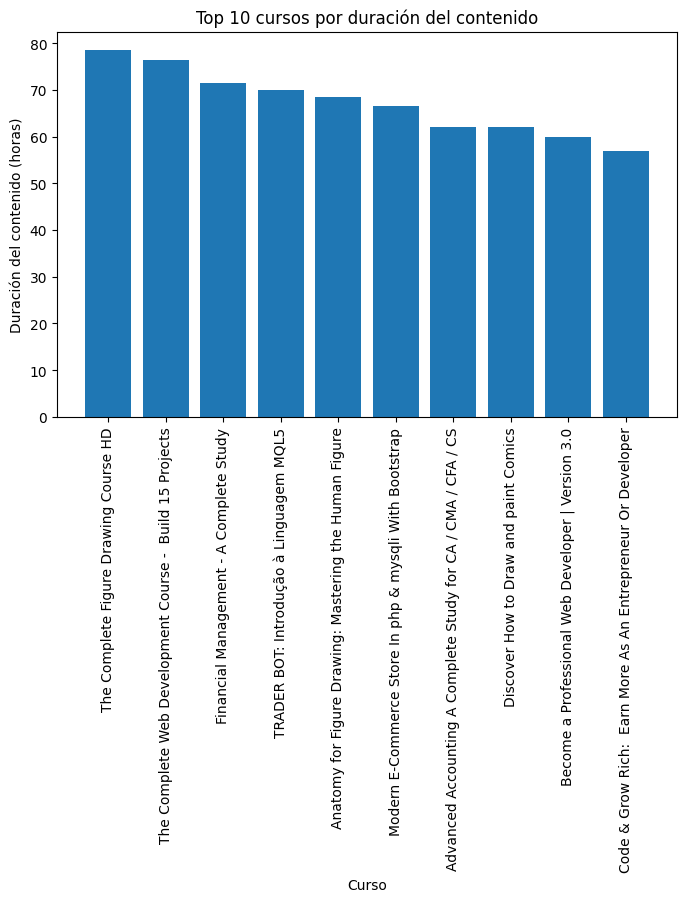

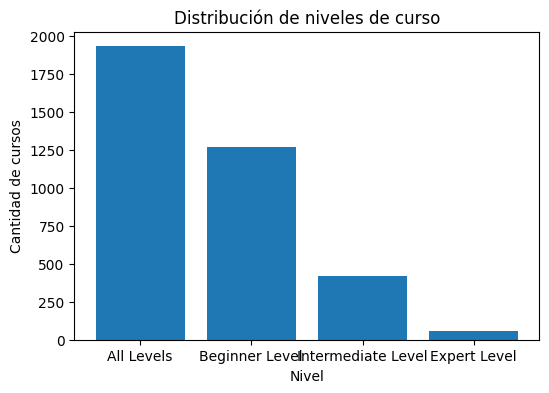

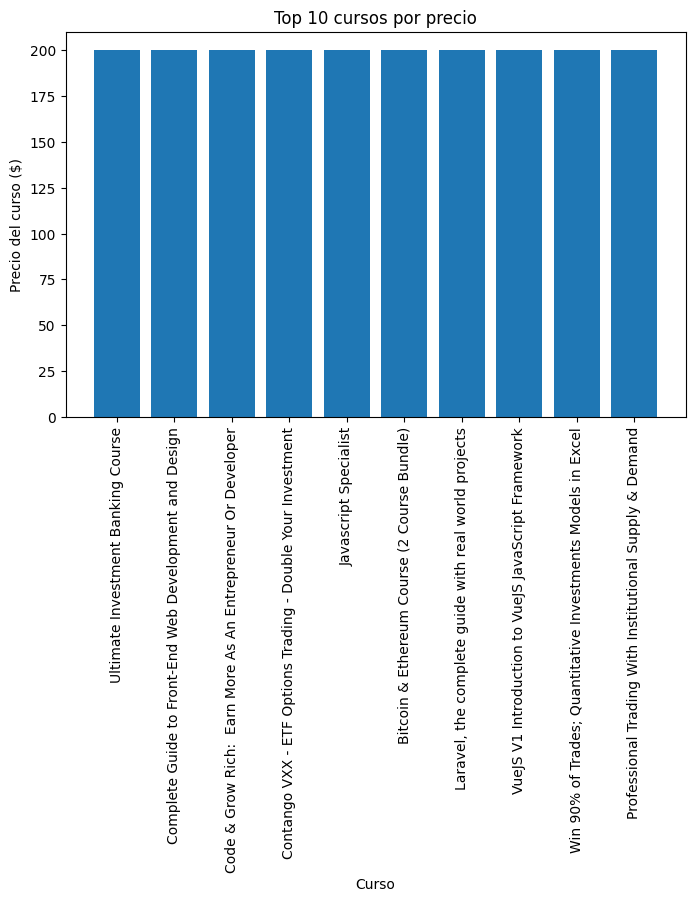

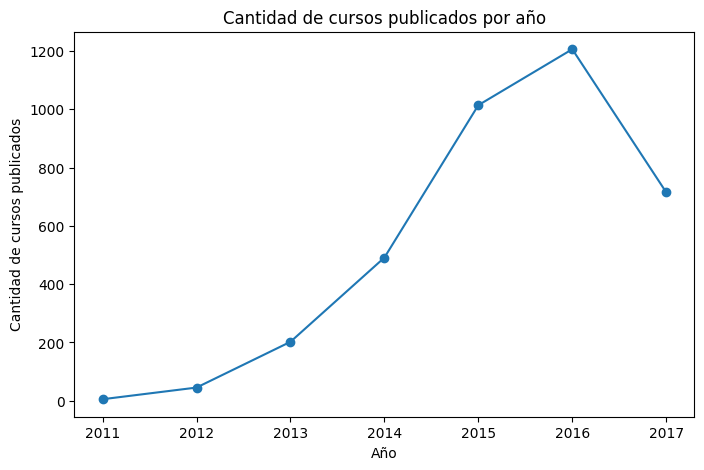

In [ ]:

# KPI 1: Número de suscriptores
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values('num_subscribers', ascending=False)
plt.bar(df_sorted['course_title'][:10], df_sorted['num_subscribers'][:10])
plt.xticks(rotation=90)
plt.xlabel('Curso')
plt.ylabel('Número de suscriptores')
plt.title('Top 10 cursos por número de suscriptores')
plt.show()
print('\n')

# KPI 2: Número de reseñas
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values('num_reviews', ascending=False)
plt.bar(df_sorted['course_title'][:10], df_sorted['num_reviews'][:10])
plt.xticks(rotation=90)
plt.xlabel('Curso')
plt.ylabel('Número de reseñas')
plt.title('Top 10 cursos por número de reseñas')
plt.show()
print('\n')

# KPI 3: Duración del contenido
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values('content_duration', ascending=False)
plt.bar(df_sorted['course_title'][:10], df_sorted['content_duration'][:10])
plt.xticks(rotation=90)
plt.xlabel('Curso')
plt.ylabel('Duración del contenido (horas)')
plt.title('Top 10 cursos por duración del contenido')
plt.show()
print('\n')

# KPI 4: Nivel del curso
level_counts = df['level'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(level_counts.index, level_counts.values)
plt.xlabel('Nivel')
plt.ylabel('Cantidad de cursos')
plt.title('Distribución de niveles de curso')
plt.show()
print('\n')

# KPI 5: Precio del curso
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values('price', ascending=False)
plt.bar(df_sorted['course_title'][:10], df_sorted['price'][:10])
plt.xticks(rotation=90)
plt.xlabel('Curso')
plt.ylabel('Precio del curso ($)')
plt.title('Top 10 cursos por precio')
plt.show()
print('\n')

# KPI 6: Fecha de publicación
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year'] = df['published_timestamp'].dt.year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de cursos publicados')
plt.title('Cantidad de cursos publicados por año')
plt.show()

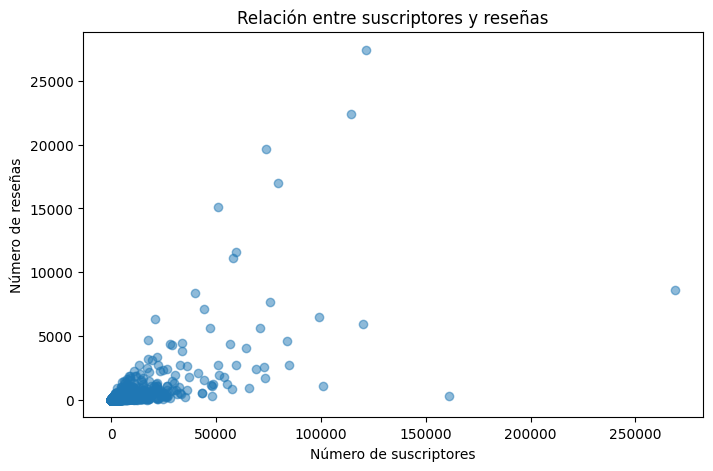

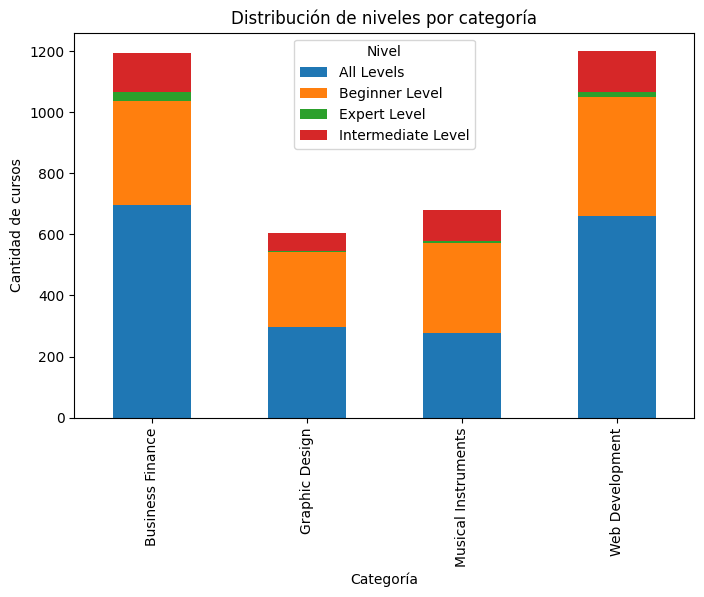

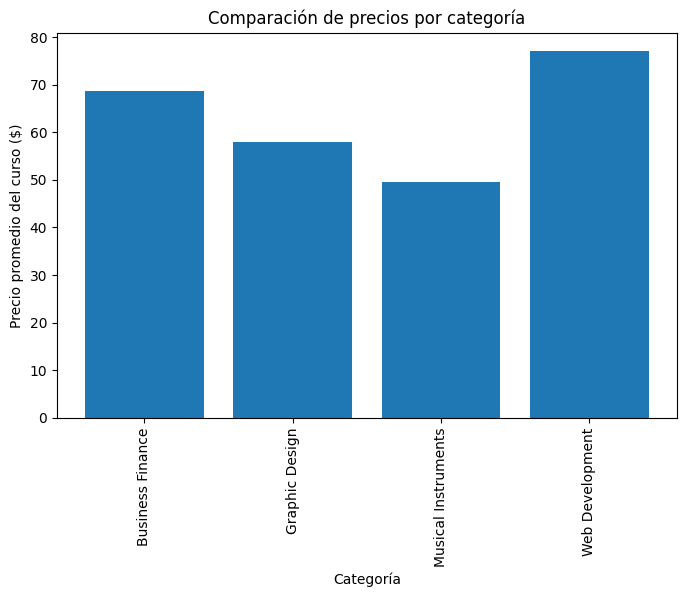

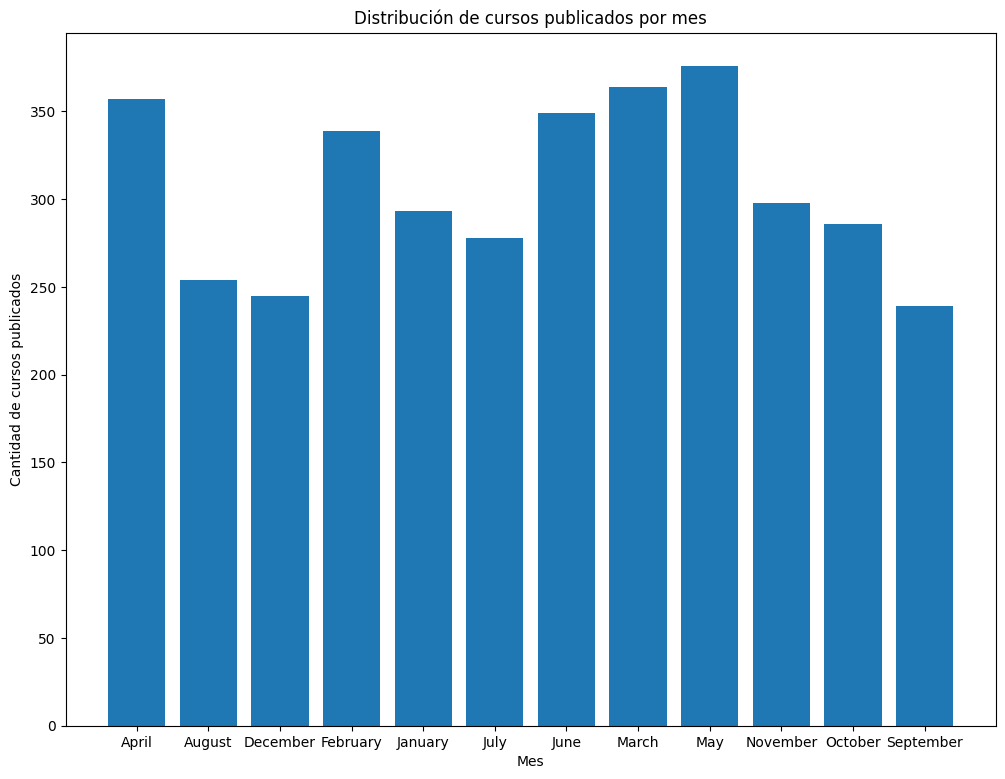

In [ ]:
# KPI 7: Promedio de calificaciones
# plt.figure(figsize=(8, 5))
# df_sorted = df.sort_values('average_rating', ascending=False)
# plt.bar(df_sorted['course_title'][:10], df_sorted['average_rating'][:10])
# plt.xticks(rotation=90)
# plt.xlabel('Curso')
# plt.ylabel('Promedio de calificaciones')
# plt.title('Top 10 cursos por promedio de calificaciones')
# plt.show()

# KPI 8: Relación entre suscriptores y reseñas
plt.figure(figsize=(8, 5))
plt.scatter(df['num_subscribers'], df['num_reviews'], alpha=0.5)
plt.xlabel('Número de suscriptores')
plt.ylabel('Número de reseñas')
plt.title('Relación entre suscriptores y reseñas')
plt.show()
print('\n')
# KPI 9: Distribución de niveles por categoría
level_by_subject = df.groupby('subject')['level'].value_counts().unstack().fillna(0)
level_by_subject.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel('Categoría')
plt.ylabel('Cantidad de cursos')
plt.title('Distribución de niveles por categoría')
plt.legend(title='Nivel')
plt.show()
print('\n')
# KPI 10: Comparación de precios por categoría
df_grouped = df.groupby('subject')['price'].mean()
plt.figure(figsize=(8, 5))
plt.bar(df_grouped.index, df_grouped.values)
plt.xticks(rotation=90)
plt.xlabel('Categoría')
plt.ylabel('Precio promedio del curso ($)')
plt.title('Comparación de precios por categoría')
plt.show()
print('\n')
# KPI 11: Distribución de cursos publicados por mes
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['month'] = df['published_timestamp'].dt.month_name()
month_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(12, 9))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Mes')
plt.ylabel('Cantidad de cursos publicados')
plt.title('Distribución de cursos publicados por mes')
plt.show()

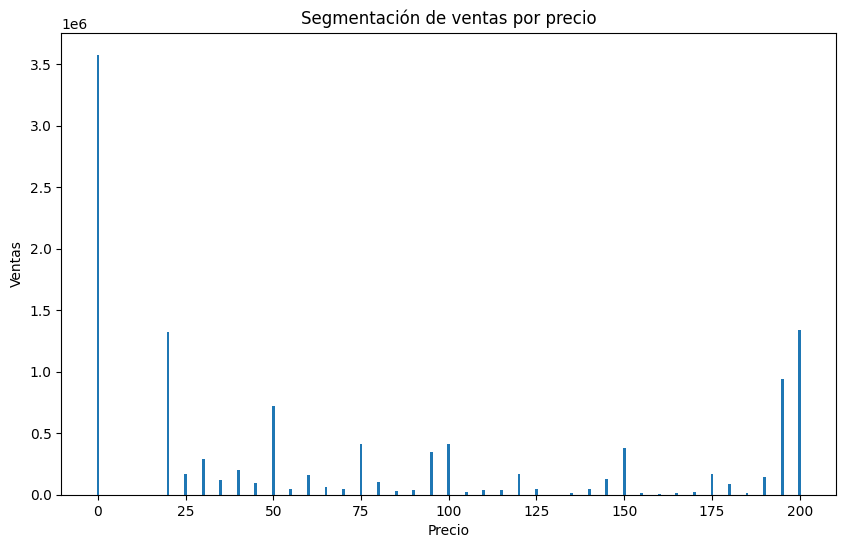

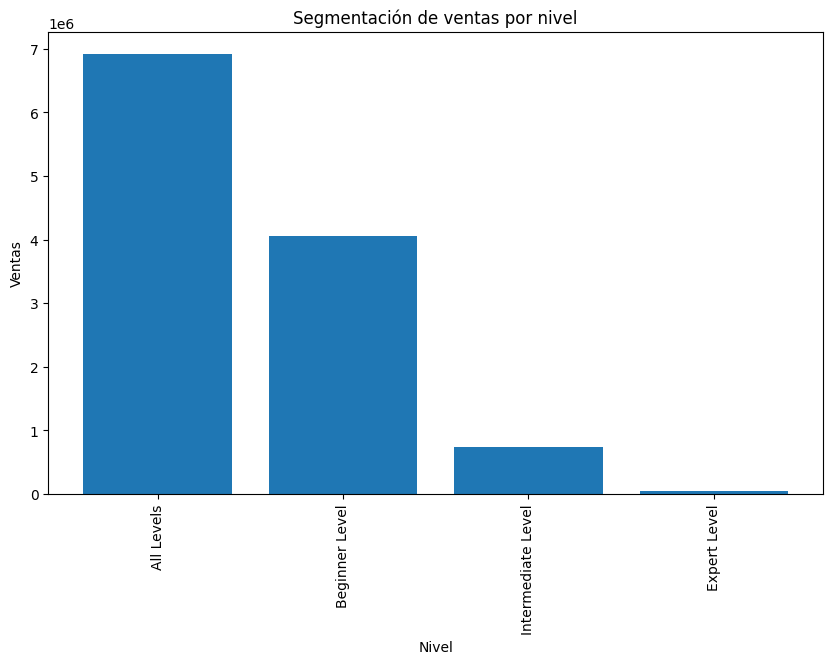

In [ ]:

# Segmentar por precio
sales_by_price = df.groupby('price')['num_subscribers'].sum().sort_values(ascending=False)

# Segmentar por idioma
#sales_by_language = df.groupby('language')['num_subscribers'].sum().sort_values(ascending=False)

# Segmentar por nivel
sales_by_level = df.groupby('level')['num_subscribers'].sum().sort_values(ascending=False)

# Segmentar por calificación (rating)
#sales_by_rating = df.groupby('average_rating')['num_subscribers'].sum().sort_values(ascending=False)

# Visualizar los resultados por precio
plt.figure(figsize=(10, 6))
plt.bar(sales_by_price.index, sales_by_price.values)
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.title('Segmentación de ventas por precio')
plt.show()

print('\n')

# Visualizar los resultados por nivel
plt.figure(figsize=(10, 6))
plt.bar(sales_by_level.index, sales_by_level.values)
plt.xlabel('Nivel')
plt.ylabel('Ventas')
plt.title('Segmentación de ventas por nivel')
plt.xticks(rotation=90)
plt.show()


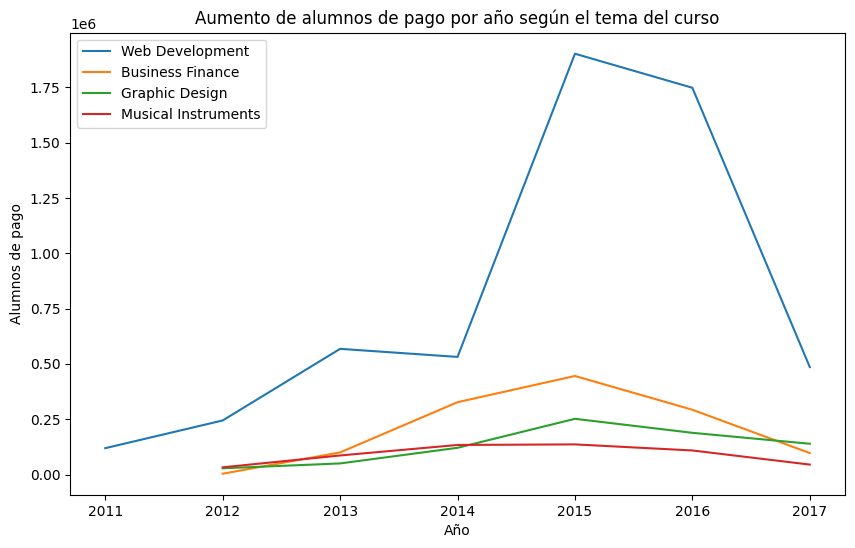

In [ ]:
#####las kpis pro puestas para este proyecto seran las siguientes##########
# Convertir la columna 'published_timestamp' en formato de fecha
#df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

# Extraer el año de la columna 'published_timestamp'
#df['year_published'] = df['published_timestamp'].dt.year

# Filtrar los cursos de pago
paid_courses = df[df['is_paid']]

# Agrupar los datos por año y tema del curso, y calcular la suma de los alumnos de pago
grouped_data = paid_courses.groupby(['year_published', 'subject'])['num_subscribers'].sum().reset_index()

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre los temas únicos y trazar una línea para cada uno
for subject in grouped_data['subject'].unique():
    subject_data = grouped_data[grouped_data['subject'] == subject]
    ax.plot(subject_data['year_published'], subject_data['num_subscribers'], label=subject)

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Alumnos de pago')
ax.set_title('Aumento de alumnos de pago por año según el tema del curso')
ax.legend()

# Mostrar la gráfica
plt.show()

Aqui tenemos la primera KPI propuesta ver cual es el aumento de alumnos de paga segu el tema del curso.

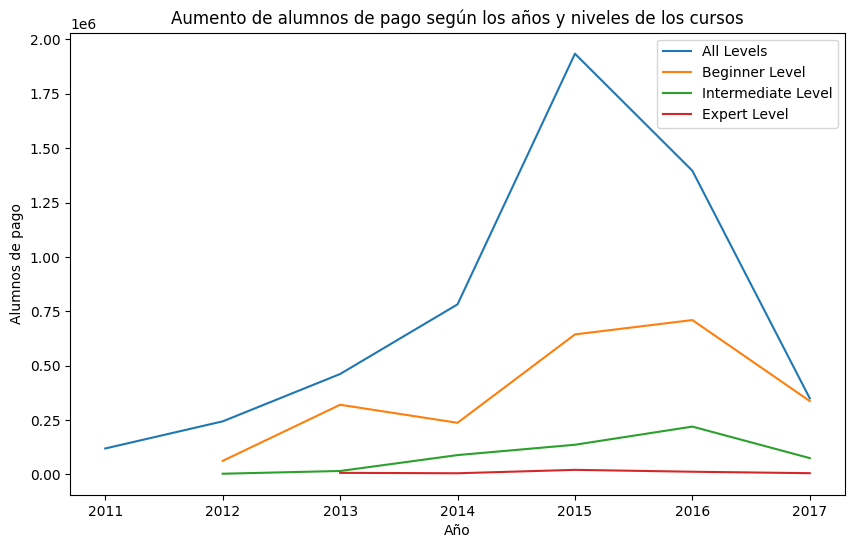

In [ ]:
#segunda KPI
# Agrupar los datos por año y nivel del curso y calcular la suma de los alumnos de pago
grouped_data = paid_courses.groupby(['year_published', 'level'])['num_subscribers'].sum().reset_index()

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre los niveles únicos y trazar una línea para cada uno
for level in grouped_data['level'].unique():
    level_data = grouped_data[grouped_data['level'] == level]
    ax.plot(level_data['year_published'], level_data['num_subscribers'], label=level)

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Alumnos de pago')
ax.set_title('Aumento de alumnos de pago según los años y niveles de los cursos')
ax.legend()

# Mostrar la gráfica
plt.show()

En este segundo kpi podemos ver el aumento de los alumnos de paga segun el nivel de los cursos

notemos que la cantidad de duracion e muy amplia por lo que es necesario o acotar la duracion o cambiar la ´presentacion de la grafica.

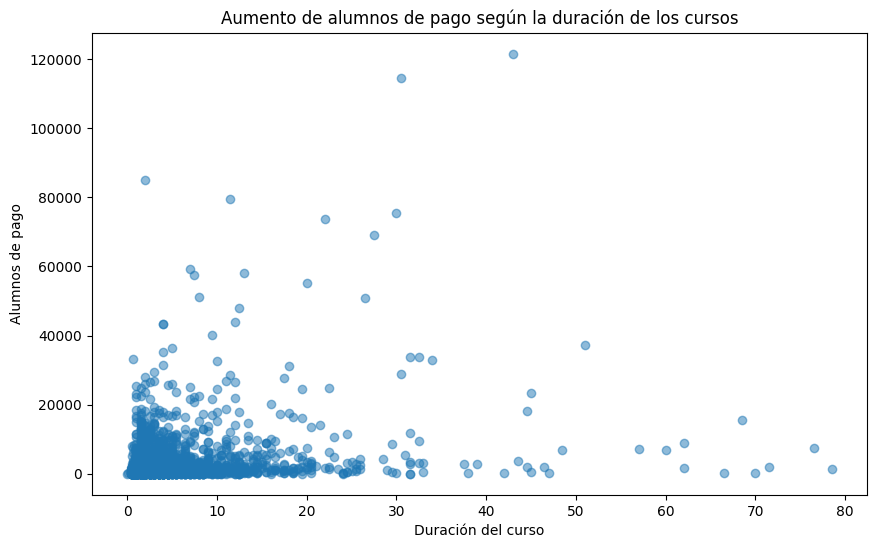

In [ ]:
#una nueva interpretacion
# Crear la gráfica de dispersión
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(paid_courses['content_duration'], paid_courses['num_subscribers'], alpha=0.5)

# Configurar etiquetas y título
ax.set_xlabel('Duración del curso')
ax.set_ylabel('Alumnos de pago')
ax.set_title('Aumento de alumnos de pago según la duración de los cursos')

# Mostrar la gráfica
plt.show()

En esta grafica se intenta hacer un analisis con la cantidad de clases pero al serel numero de clases con varias entradas no necesariamente refleja un buen analisis, y si se  acota el dominio nos dara una mejor lectura de los datos.

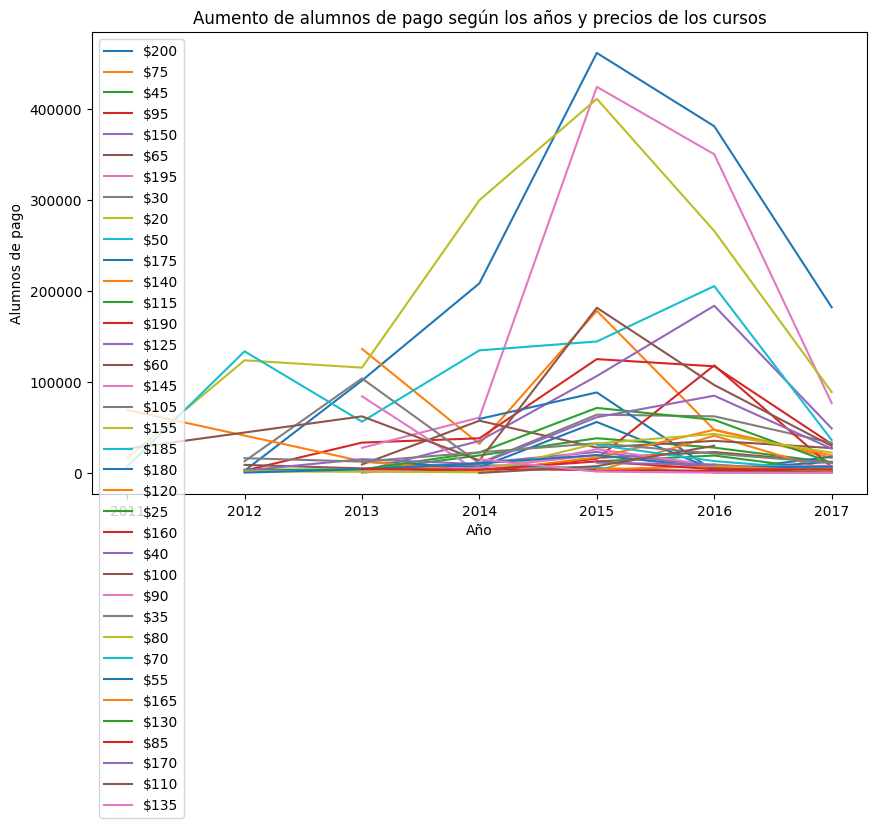

In [ ]:
# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre los precios únicos y trazar una línea para cada uno
for price in paid_courses['price'].unique():
    price_data = paid_courses[paid_courses['price'] == price]
    grouped_data = price_data.groupby('year_published')['num_subscribers'].sum().reset_index()
    ax.plot(grouped_data['year_published'], grouped_data['num_subscribers'], label=f'${price}')

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Alumnos de pago')
ax.set_title('Aumento de alumnos de pago según los años y precios de los cursos')
ax.legend()

# Mostrar la gráfica
plt.show()

<ipython-input-53-8add069e1034>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_courses['price_range'] = pd.cut(paid_courses['price'], bins=[r[0] for r in price_ranges] + [price_ranges[-1][1]], labels=[f"{r[0]}-{r[1]}" for r in price_ranges])


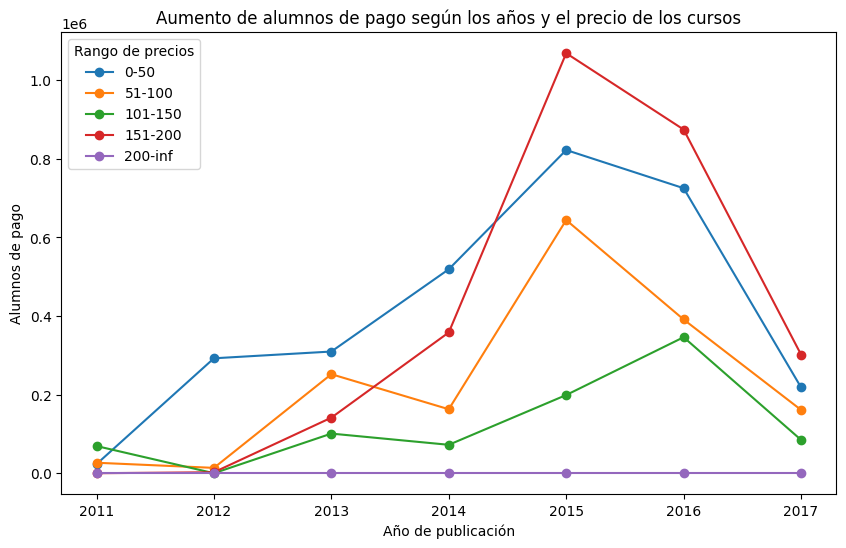

In [ ]:
# Filtrar los cursos de pago
#paid_courses = data[data['is_paid']]

# Convertir la columna 'published_timestamp' en formato de fecha
#paid_courses['published_timestamp'] = pd.to_datetime(paid_courses['published_timestamp'])

# Extraer el año de la columna 'published_timestamp'
##paid_courses['published_year'] = paid_courses['published_timestamp'].dt.year

# Definir los rangos de precios
price_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (200, float('inf'))]

# Crear la nueva columna 'price_range'
paid_courses['price_range'] = pd.cut(paid_courses['price'], bins=[r[0] for r in price_ranges] + [price_ranges[-1][1]], labels=[f"{r[0]}-{r[1]}" for r in price_ranges])

# Agrupar los datos por año y por rango de precios y calcular la suma de suscriptores
grouped_data = paid_courses.groupby(['year_published', 'price_range'])['num_subscribers'].sum().reset_index()

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de líneas para cada rango de precios
for price_range in grouped_data['price_range'].unique():
    subset = grouped_data[grouped_data['price_range'] == price_range]
    ax.plot(subset['year_published'], subset['num_subscribers'], marker='o', label=price_range)

# Configurar etiquetas y título
ax.set_xlabel('Año de publicación')
ax.set_ylabel('Alumnos de pago')
ax.set_title('Aumento de alumnos de pago según los años y el precio de los cursos')

# Mostrar la leyenda
ax.legend(title='Rango de precios')

# Mostrar la gráfica
plt.show()

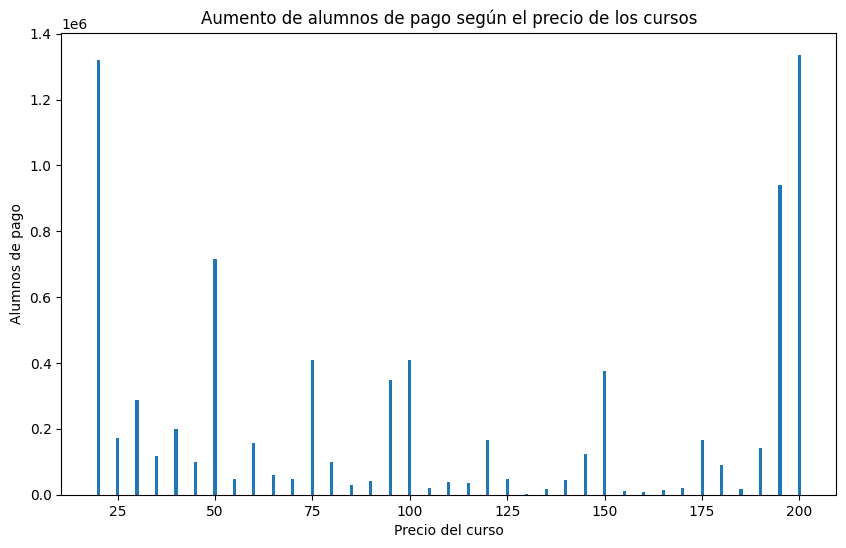

In [ ]:
# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupar los datos por precio y calcular la suma de suscriptores
grouped_data = paid_courses.groupby('price')['num_subscribers'].sum().reset_index()

# Ordenar los datos por precio de forma ascendente
grouped_data = grouped_data.sort_values(by='price')

# Crear la gráfica de barras
ax.bar(grouped_data['price'], grouped_data['num_subscribers'])

# Configurar etiquetas y título
ax.set_xlabel('Precio del curso')
ax.set_ylabel('Alumnos de pago')
ax.set_title('Aumento de alumnos de pago según el precio de los cursos')

# Mostrar la gráfica
plt.show()

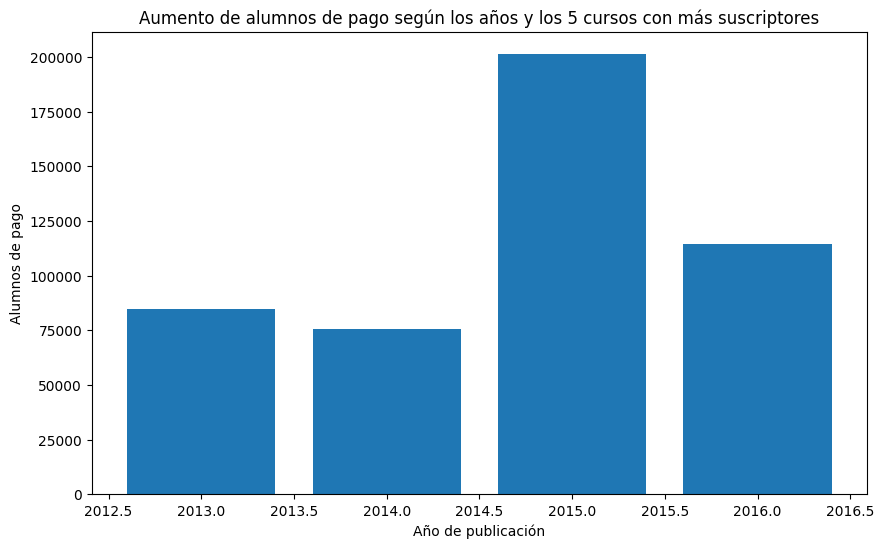

In [ ]:
# Ordenar los cursos por el número de suscriptores en orden descendente
top_courses = paid_courses.nlargest(5, 'num_subscribers')

# Convertir la columna 'published_timestamp' en formato de fecha
top_courses['published_timestamp'] = pd.to_datetime(top_courses['published_timestamp'])

# Extraer el año de la columna 'published_timestamp'
top_courses['published_year'] = top_courses['published_timestamp'].dt.year

# Agrupar los datos por año y calcular la suma de suscriptores
grouped_data = top_courses.groupby('published_year')['num_subscribers'].sum().reset_index()

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras
ax.bar(grouped_data['published_year'], grouped_data['num_subscribers'])

# Configurar etiquetas y título
ax.set_xlabel('Año de publicación')
ax.set_ylabel('Alumnos de pago')
ax.set_title('Aumento de alumnos de pago según los años y los 5 cursos con más suscriptores')

# Mostrar la gráfica
plt.show()

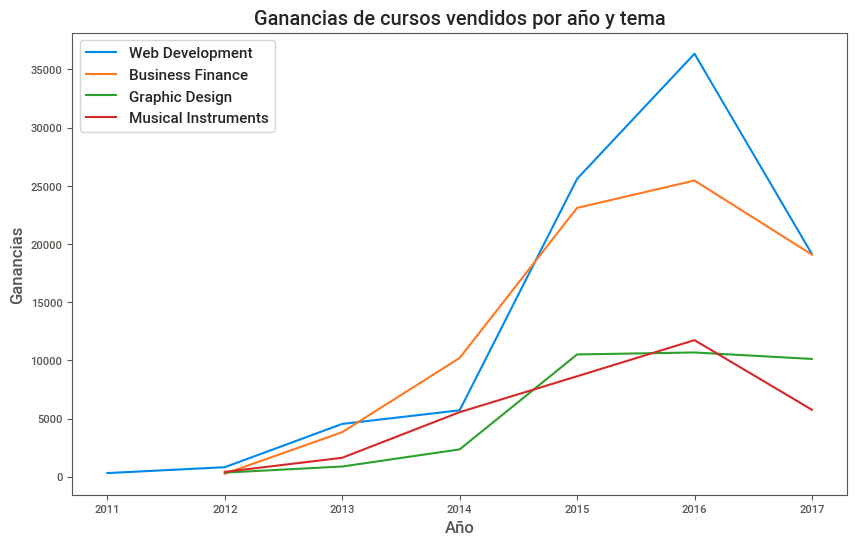

In [ ]:
# Convertir la columna 'published_timestamp' en formato de fecha
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

# Extraer el año de la columna 'published_timestamp' y asignarlo a la columna 'published_year'
df['published_year'] = df['published_timestamp'].dt.year

# Agrupar los datos por año y tema, y calcular la suma de las ganancias
grouped_data = df.groupby(['published_year', 'subject'])['price'].sum().reset_index()

# Crear la gráfica de líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada tema y trazar una línea para cada uno
for subject in grouped_data['subject'].unique():
    subject_data = grouped_data[grouped_data['subject'] == subject]
    ax.plot(subject_data['published_year'], subject_data['price'], label=subject)

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias de cursos vendidos por año y tema')

# Mostrar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

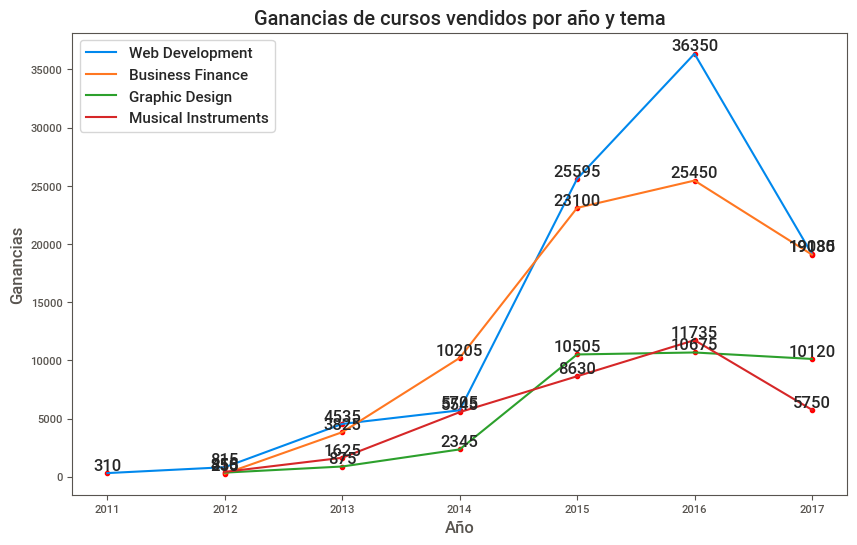

In [ ]:
# Convertir la columna 'published_timestamp' en formato de fecha
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

# Extraer el año de la columna 'published_timestamp' y asignarlo a la columna 'published_year'
df['published_year'] = df['published_timestamp'].dt.year

# Agrupar los datos por año y tema, y calcular la suma de las ganancias
grouped_data = df.groupby(['published_year', 'subject'])['price'].sum().reset_index()

# Crear la gráfica de líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada tema y trazar una línea para cada uno
for subject in grouped_data['subject'].unique():
    subject_data = grouped_data[grouped_data['subject'] == subject]
    ax.plot(subject_data['published_year'], subject_data['price'], label=subject)

    # Agregar los puntos en cada año
    ax.scatter(subject_data['published_year'], subject_data['price'], color='red')

    # Agregar etiquetas a los puntos
    for i, row in subject_data.iterrows():
        ax.text(row['published_year'], row['price'], str(row['price']), ha='center', va='bottom')

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias de cursos vendidos por año y tema')

# Mostrar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

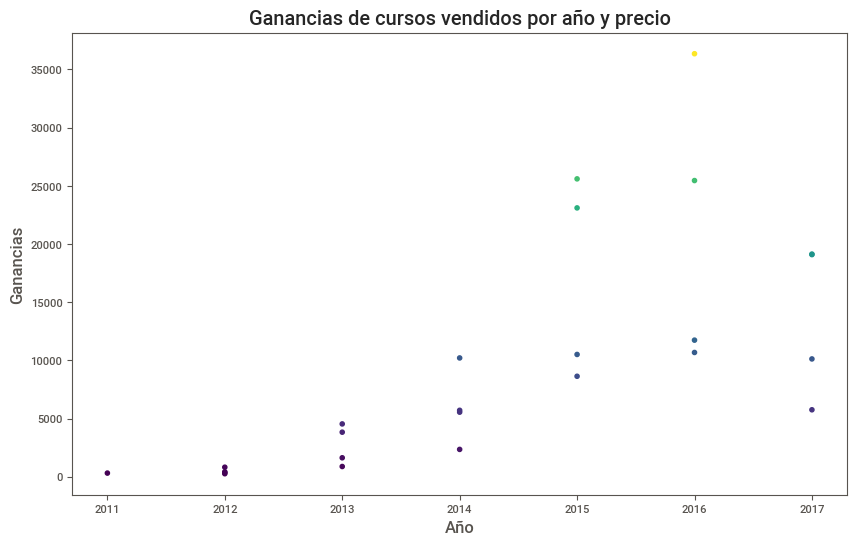

In [ ]:
# Crear la gráfica de dispersión
fig, ax = plt.subplots(figsize=(10, 6))

# Generar la gráfica de dispersión
ax.scatter(grouped_data['published_year'], grouped_data['price'], c=grouped_data['price'], cmap='viridis')

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias de cursos vendidos por año y precio')

# Mostrar la gráfica
plt.show()

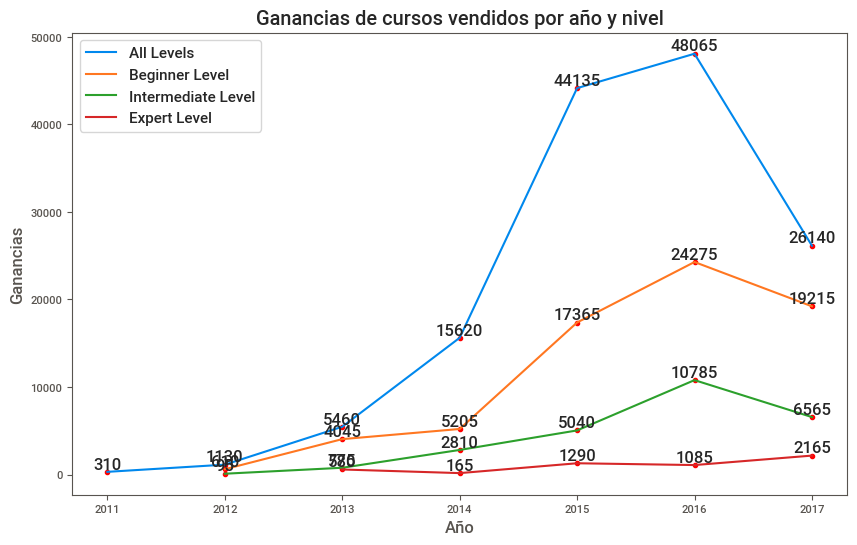

In [ ]:
# Agrupar los datos por año y nivel, y calcular la suma de las ganancias
grouped_data = df.groupby(['published_year', 'level'])['price'].sum().reset_index()

# Crear la gráfica de líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada nivel y trazar una línea para cada uno
for level in grouped_data['level'].unique():
    level_data = grouped_data[grouped_data['level'] == level]
    ax.plot(level_data['published_year'], level_data['price'], label=level)

    # Agregar los puntos en cada año
    ax.scatter(level_data['published_year'], level_data['price'], color='red')

    # Agregar etiquetas a los puntos
    for i, row in level_data.iterrows():
        ax.text(row['published_year'], row['price'], str(row['price']), ha='center', va='bottom')

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias de cursos vendidos por año y nivel')

# Mostrar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [ ]:
#veamos cuantos tipos de cusros ofrece
df_udemy['subject'].value_counts()
#notemos que la mayoria es de web seguida de business

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [ ]:
#veamos que tanto influyen estas para el numero de alumnos
df_udemy_sub = pd.get_dummies(df_udemy['subject'])

In [ ]:
#unasmos los data set
df_udemy = pd.concat([df_udemy, df_udemy_sub], axis=1)

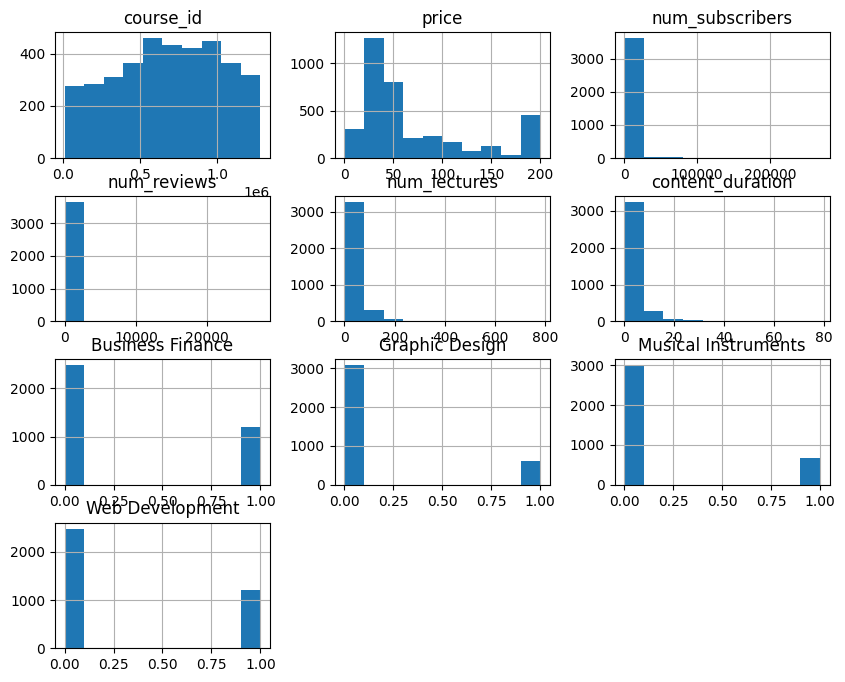

In [ ]:
df_udemy.hist(figsize=(10, 8))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

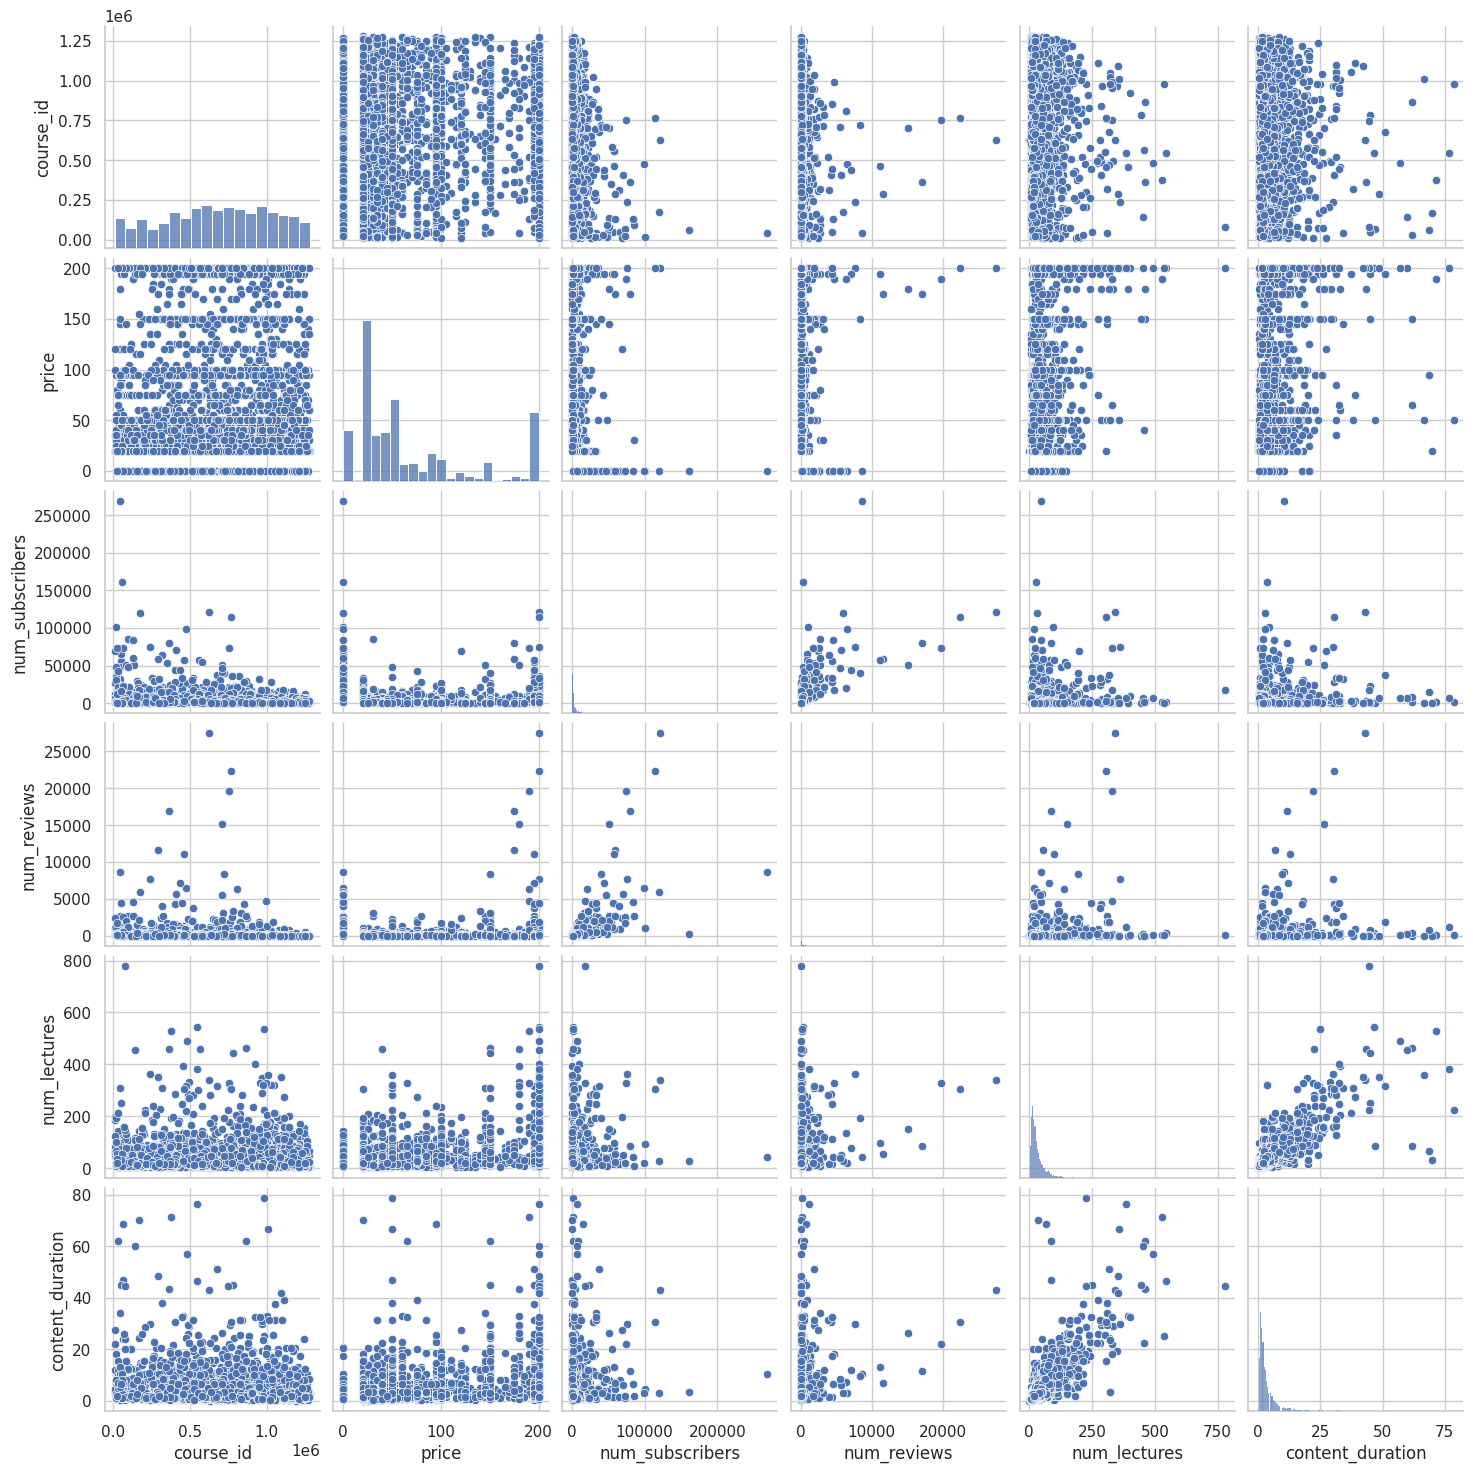

In [ ]:
#analisis de los datos

sns.set(style= 'whitegrid', context= 'notebook')
cols = ['course_id', 'price','num_subscribers', 'num_reviews', 'num_lectures','content_duration']
sns.pairplot(df_udemy[cols], height =2.5)
plt.show

<ipython-input-63-6e2b75ca63f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_udemy.corr()['num_subscribers'].sort_values(ascending= True).plot(kind='bar')


<Axes: >

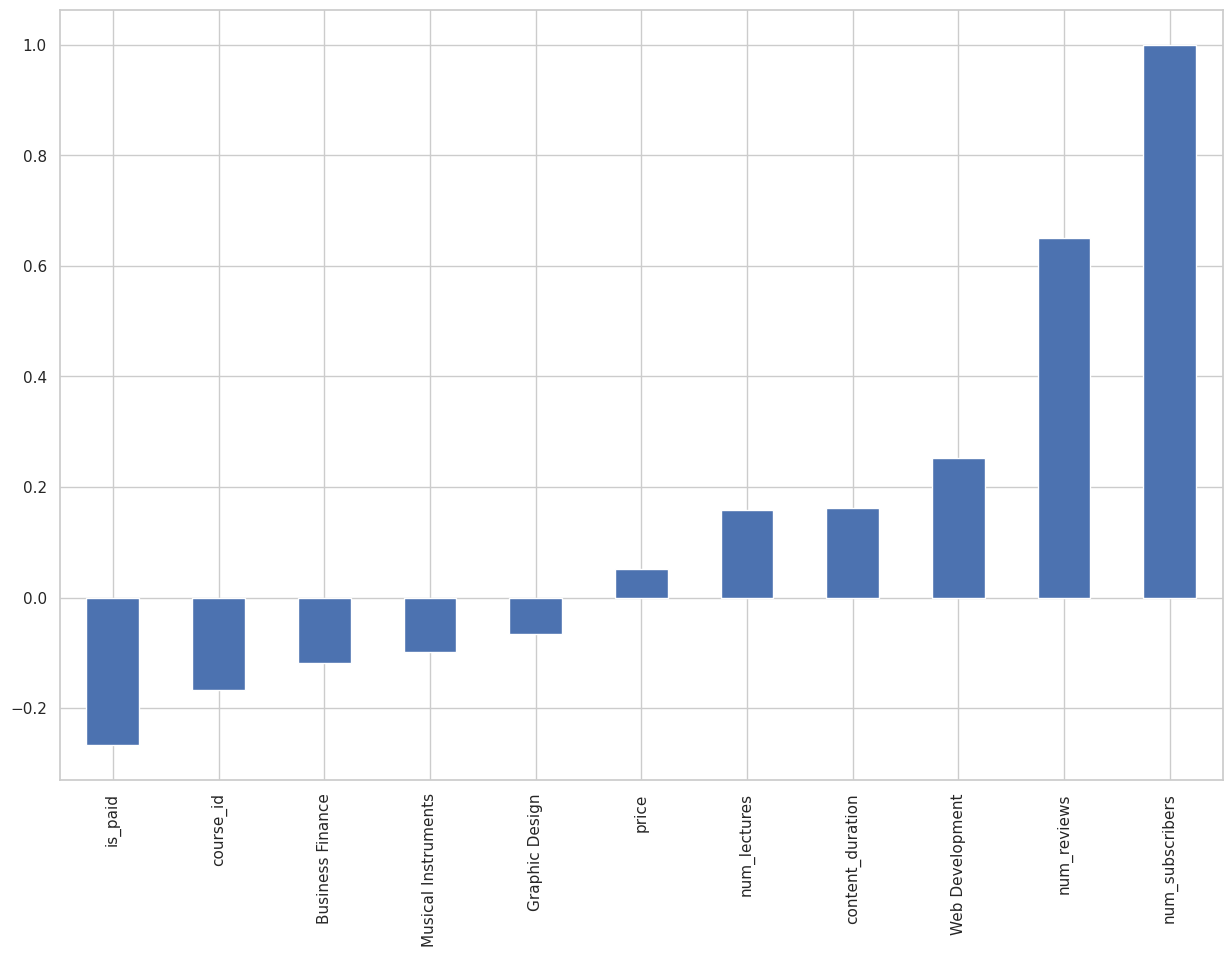

In [ ]:
plt.figure(figsize = (15,10))
df_udemy.corr()['num_subscribers'].sort_values(ascending= True).plot(kind='bar')

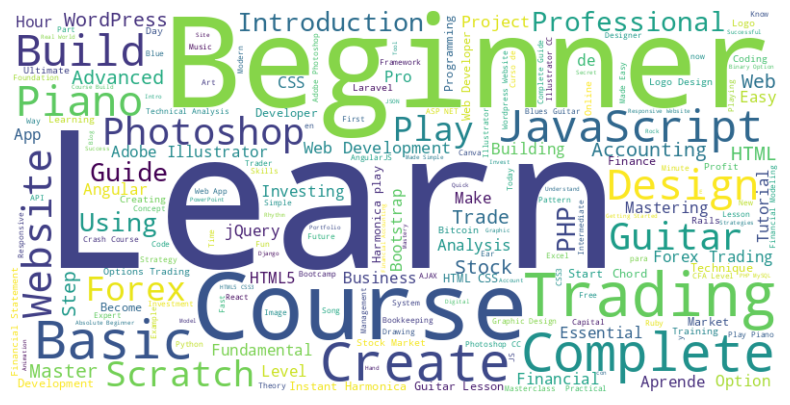

In [ ]:
# Unir todos los títulos en una sola cadena
text = ' '.join(df_udemy['course_title'].tolist())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#analicemos a los cursos de paga
df_udemy['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

In [ ]:
#tomemos solo en cuenta a los de pago
df_udemy_paga = df_udemy[df_udemy['is_paid'] == True]

<ipython-input-67-5ca4bbd32472>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_udemy_paga.corr()['num_subscribers'].sort_values(ascending= True).plot(kind='bar')


<Axes: >

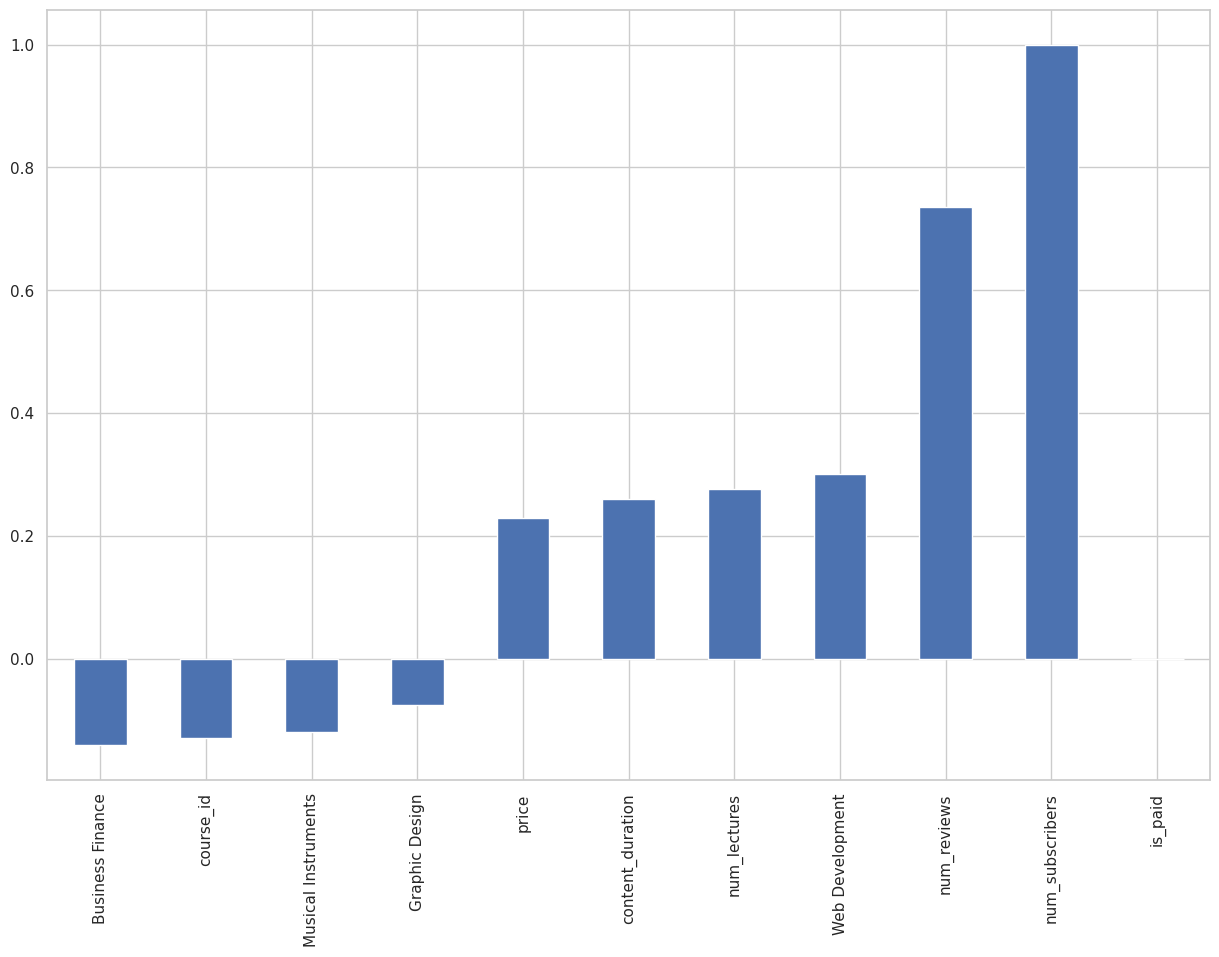

In [ ]:
#veamos como se ve la correlacion
plt.figure(figsize = (15,10))
df_udemy_paga.corr()['num_subscribers'].sort_values(ascending= True).plot(kind='bar')

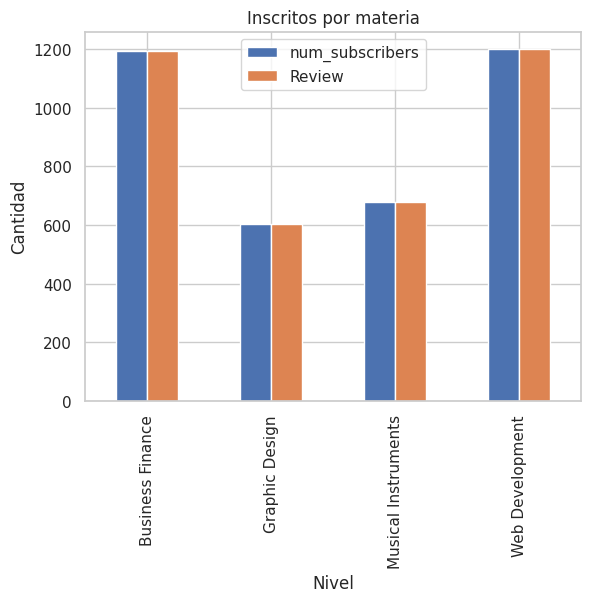

In [ ]:
pivot_table_udemy = df_udemy.pivot_table(index='subject', values='num_subscribers', aggfunc='count')

# Agregar la columna de cantidad de inscritos a la tabla de pivote
pivot_table_udemy['Review'] = df_udemy.groupby('subject')['num_reviews'].count()

# Crear la gráfica de barras con ambas columnas
pivot_table_udemy.plot(kind='bar')

# Personalizar la gráfica
plt.xlabel('Nivel')
plt.ylabel('Cantidad')
plt.title('Inscritos por materia')

# Mostrar la gráfica
plt.show()

Notemos que no nos puede decir mucho la cantidad de reviews contra la cantidad de inscritos

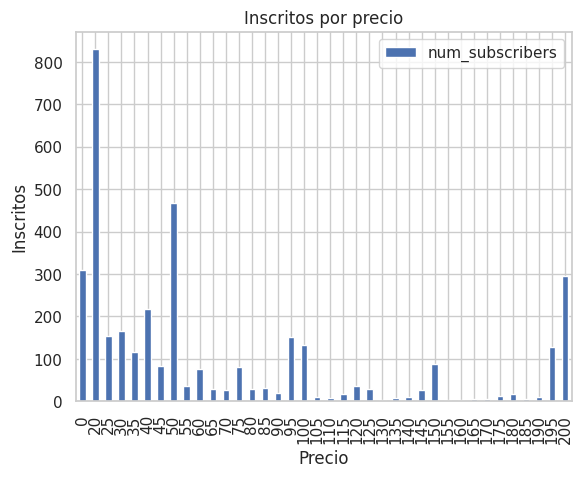

In [ ]:
pivot_table_udemy = df_udemy.pivot_table(index='price', values='num_subscribers', aggfunc='count')

# Crear la gráfica de barras con ambas columnas
pivot_table_udemy.plot(kind='bar')

# Personalizar la gráfica
plt.xlabel('Precio')
plt.ylabel('Inscritos')
plt.title('Inscritos por precio')

# Mostrar la gráfica
plt.show()

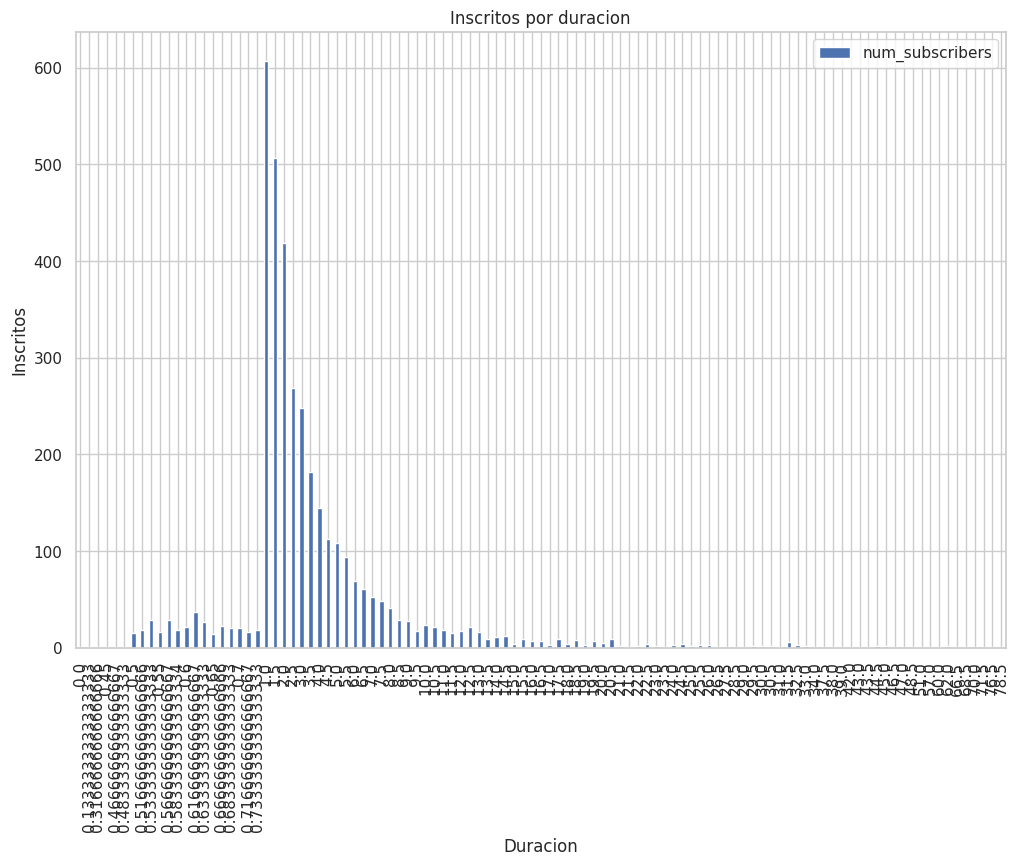

In [ ]:

pivot_table_udemy_dos = df_udemy.pivot_table(index='content_duration', values='num_subscribers', aggfunc='count')
#para una mejor lectura hay que hacer mas grande la grafica
#plt.figure(figsize=(14, 10))
# Crear la gráfica de barras con ambas columnas
pivot_table_udemy_dos.plot(kind='bar', figsize=(12, 8))

# Personalizar la gráfica
plt.xlabel('Duracion')
plt.ylabel('Inscritos')
plt.title('Inscritos por duracion')

# Mostrar la gráfica
plt.show()

Notenmos que hay mas incritos en los cursos de una hora hasta 8 horas

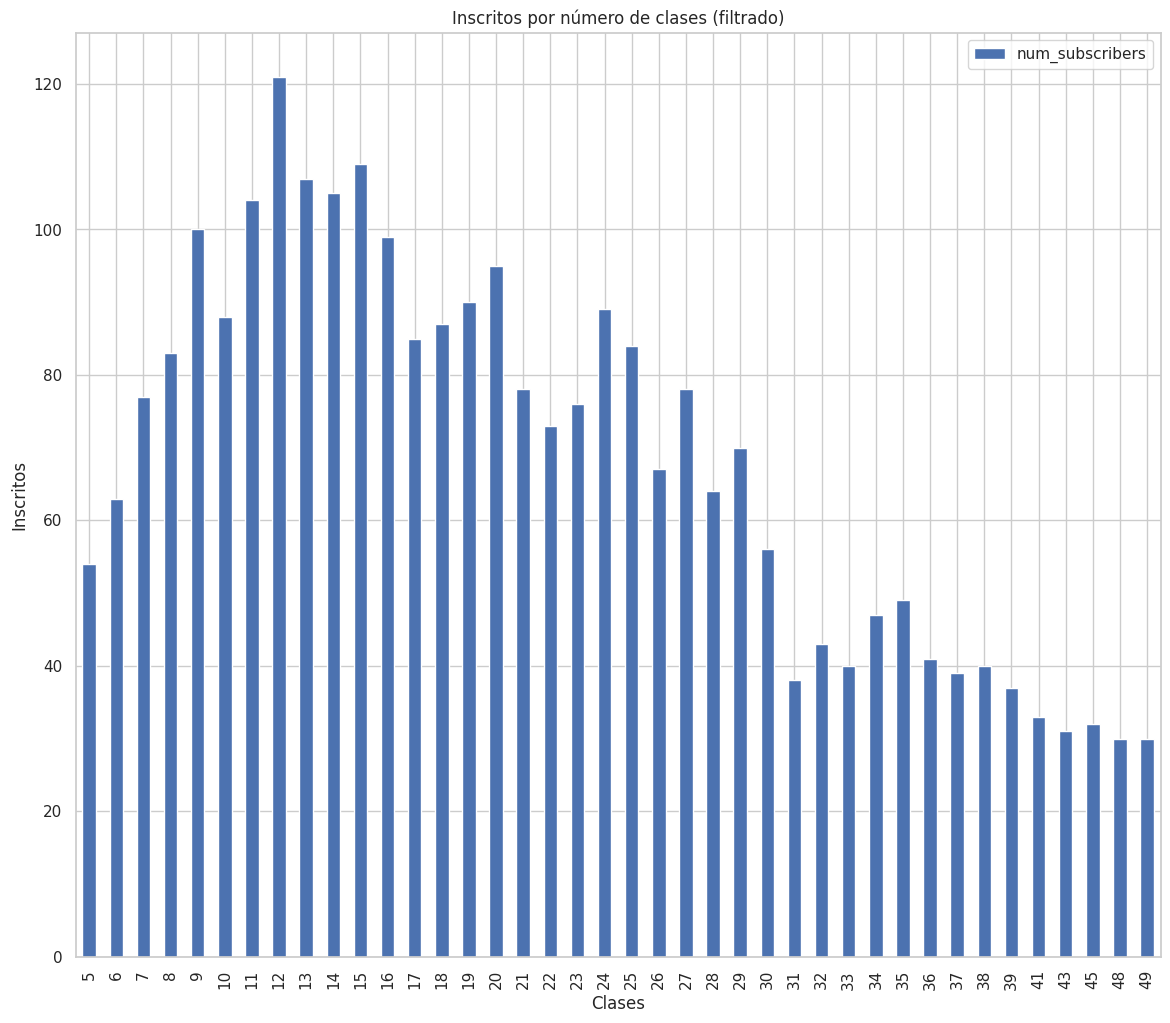

In [ ]:
# Crear la tabla de pivote con el filtrado
pivot_table_udemy_filtered = pivot_table_udemy[pivot_table_udemy['num_subscribers'] >= 30]

# Crear la gráfica de barras con el tamaño ajustado
pivot_table_udemy_filtered.plot(kind='bar', figsize=(14, 12))

# Personalizar la gráfica
plt.xlabel('Clases')
plt.ylabel('Inscritos')
plt.title('Inscritos por número de clases (filtrado)')

# Mostrar la gráfica
plt.show()

Hay mas cantidad de inscritos en los cursos de 20 a 50 dolares